L'apprentissage consiste à ajuster progressivement les paramètres d'EfficientNet-B0 par descente de gradient sur la fonction de perte Cross-Entropy, en comparant les prédictions du modèle aux étiquettes validées par consensus d'experts.

Sélection uniquement des boîtes délimitantes où tous les experts sont d'accord sur la classe
Extraction des zones délimitées par les boîtes (crop)
Redimensionnement uniforme à 224×224 pixels

Augmentation des données: Retournements horizontaux aléatoires, Rotations légères (±10°), Variations de luminosité/contraste, Recadrages aléatoires (tout en préservant 80-100% de l'image)

Post-traitement: Application de softmax pour convertir les sorties brutes en probabilités, Sélection de la classe avec la probabilité maximale




In [1]:
# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1er Modèle
2problèemes:

Using device: cpu
Processing training data...
Found 1117 images with corresponding label files


  0%|          | 1/1117 [00:00<09:51,  1.89it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.88621524454531210.99590416300986220.787372966668278.jpg: Coordinate 'right' is less than 'left'


  0%|          | 4/1117 [00:02<09:25,  1.97it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78616272638120070.88494137197418770.20365329503870644.jpg: Coordinate 'right' is less than 'left'


  1%|          | 6/1117 [00:03<09:39,  1.92it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.7048978816731850.57413581528669060.9575878053085735.jpg: Coordinate 'right' is less than 'left'


  1%|          | 8/1117 [00:04<09:20,  1.98it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59136983489448170.48200573330950170.04169774522486436.jpg: Coordinate 'right' is less than 'left'


  1%|          | 10/1117 [00:05<09:35,  1.92it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.35739040820638790.195349603148241240.8009949312961488.jpg: could not convert string to float: '2009/2010'


  1%|          | 11/1117 [00:05<09:02,  2.04it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.123696834200993640.75082311262096020.7495485716292503.jpg: could not convert string to float: '2009/2010'


  2%|▏         | 21/1117 [00:57<46:47,  2.56s/it]  

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.4400205417183810.16988838360979840.3261683013925626.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.145704372530552460.477843543814151950.07061960832892811.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.77589813861635630.125271074186480980.8868120039940133.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78548342453101530.5793990101704430.8303137653728199.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.96970757082311510.83613380874380990.10677670160915165.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.335311481026566270.50712371620590190.7976991254996618.

  3%|▎         | 39/1117 [00:58<06:48,  2.64it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.63655823880799480.394675027679659230.3936396787749533.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.98644495462599470.93325276465231450.7561740762248178.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.4336936642745910.81487627400629190.021909959747049346.jpg: could not convert string to float: '2009/2010'


  4%|▍         | 46/1117 [00:58<03:44,  4.77it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.41788426098803380.92979452689724570.6803910635556595.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82190560108561060.41936354823223940.22529688748048748.jpg: could not convert string to float: '2009/2010'


  5%|▌         | 57/1117 [00:59<01:40, 10.54it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.8034316519340970.93112919135312520.5538070812382857.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.7482457576487960.98716365961627530.4978536471952415.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.60819995374036220.489949758160709740.5970990764907964.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.146123937883317230.456862434916520230.6494481644311175.jpg: could not convert string to float: 'Lysimétriques'


  6%|▌         | 66/1117 [00:59<01:04, 16.39it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.495030234569836640.389170895243869940.08423550089962262.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.175193405506910650.69059762830324590.3535170597316414.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.33885957294751110.416943139310136160.256432986012062.jpg: Coordinate 'right' is less than 'left'


  7%|▋         | 78/1117 [00:59<00:43, 23.79it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.336305056556949530.50914512882336390.4400496441473867.jpg: could not convert string to float: 'RMQS'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.93149706634583610.13512121330685610.04937436852111843.jpg: could not convert string to float: 'Benjamin'


  7%|▋         | 82/1117 [00:59<00:40, 25.27it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.95463667268022310.89599566488968190.9311123574546438.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0216159506691889770.54387849803646740.6494278020385656.jpg: could not convert string to float: '2009/2010'


  9%|▊         | 96/1117 [01:00<00:25, 40.29it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84931714812414770.40909644073665930.0966516809499246.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0128848337894155170.13444270497576860.46458342599501423.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.63539569806677050.70009446399601970.6964644149496606.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.62605074853011310.330587410273752050.12915415439139044.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.72386832613754140.109456796091410010.12697264287540178.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.071332670657448970.280200843338187840.7856950505767

  9%|▉         | 106/1117 [01:00<00:26, 37.48it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.33325170287698670.96812892746128780.6704528244465017.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.059167928280434270.205613071702015260.8570132472776029.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.410437084038029370.42344107278270450.2972567591128594.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.27564160329477040.141224448042256870.3342558121668405.jpg: Coordinate 'right' is less than 'left'


 11%|█         | 118/1117 [01:00<00:22, 44.04it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82052534693172150.71614448694824540.48841559373549215.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59631714973371390.67960278310378540.8799658288114198.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78326408007238820.285706742888796940.3123259550307331.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.92446316922113850.0089741768300928280.0780632717473646.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.28790605737875310.56823986569094880.11338951206524905.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.66658025031253410.39021707554464080.667348578026

 11%|█▏        | 128/1117 [01:01<00:25, 38.32it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.44106997306467420.56794531873851430.1752966982984867.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56176300573168870.48780998648967290.2093468778912544.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.77619775752470210.9094894541835540.6409477632519964.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.389807088577805770.96355131156067520.5155702445700212.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.44010852700244020.080041184859023230.5480642242796065.jpg: could not convert string to float: 'Lysimétriques'


 12%|█▏        | 133/1117 [01:01<00:24, 39.37it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.22678435809782660.66440501855321050.3877998019497382.jpg: Coordinate 'right' is less than 'left'


 12%|█▏        | 138/1117 [01:01<00:38, 25.51it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78279068013323820.0133698036524962930.6581914263026133.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.38052530907129520.221427623258997790.22336977831131055.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.30794667290549750.474317871511381160.9217448320148947.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9027408768380820.46978643031129130.005100910175457551.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81245770267556640.5445691414026210.6980889744839394.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.081600352233045180.9770481944

 14%|█▍        | 154/1117 [01:01<00:22, 43.05it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.87602917625983830.65842725393857290.9401100384850408.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84534289323490320.83834603037547670.42122861730481476.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.6540842607850920.031977229159764640.5553675112510094.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.61046403317024460.415252692024415950.43547982566397114.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.72685271212269780.62665121015424220.8254513284456478.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81856414144596770.0053709731187551180.

 15%|█▌        | 168/1117 [01:02<00:21, 45.07it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.7253869206559770.311280165658320060.1540578228991759.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.129153960168337470.6683651407227280.5313344183343949.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.38621977505855610.17820822225839140.6145135210347648.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.210821372159124330.4762091687910820.4489144122430705.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.21025248805112450.390746945197105950.5385310429082668.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.22810034875336050.53191795369614130.5581

 16%|█▌        | 181/1117 [01:02<00:19, 47.27it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.13549901185848390.119747066899089760.17470375470018962.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.089981968747109840.508879517764620.7223178763699357.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84809061808806620.82244785595593120.930917349409737.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.45231809471088370.94187427662868320.2711545222678027.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.35779427537674080.81838767186087970.3388362023847391.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.60765428932735640.93618030820017870.12468

 18%|█▊        | 196/1117 [01:02<00:19, 48.34it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.13452663751511750.46890909906241450.02788170551465563.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9339911610374960.5899212052707650.8028145647511242.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.77255618222900340.034430017735025630.8625841227348513.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84117593610054710.82301480346625040.3011023234374468.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56112592616370460.493444761394176150.18977966665871715.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.208028352656871250.89811188908855720.01829217979

 18%|█▊        | 202/1117 [01:02<00:21, 43.37it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56450826079178930.29991834090075510.9706312161422521.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.27938154882183130.41362309832841140.7751302869990451.jpg: could not convert string to float: '2009/2010'


 19%|█▉        | 213/1117 [01:03<00:23, 37.77it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.16679898148291550.77385590141272790.24784423119661836.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.168679882024861730.8783976500856330.9009343950727626.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.146710520754887770.061680727098463730.29793019926054054.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.58403507330502550.483837709635504540.975788757162209.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.043000543892711460.345573863626243540.5080030190461047.jpg: could not convert string to float: 'Lysimétriques'


 20%|█▉        | 218/1117 [01:03<00:25, 34.76it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.32618176191739580.76951147073495950.2321948731475495.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.2871778443008770.59580946967408020.16658607803209602.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.138616966928873820.99928504837811540.7378097995554616.jpg: could not convert string to float: '2009/2010'


 20%|██        | 227/1117 [01:03<00:26, 34.03it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.239691906166533460.60161065664803560.8286275162808597.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78101509419777350.458431036478723850.207191827347871.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67243015165840510.67699382712523150.895690682415497.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.419932578877118430.050170467138769160.6277733854185941.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.159603930631144860.42434145755752630.21438323764076705.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90723564301815580.74180425842353910.751404158

 21%|██        | 235/1117 [01:03<00:20, 43.76it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.207453003448606180.14534329096462540.3554031021327062.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0509706931423382640.87169212945398710.29113188913304544.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.206221696254532680.67691539279911110.8904348241186787.jpg: Coordinate 'right' is less than 'left'


 22%|██▏       | 247/1117 [01:03<00:21, 40.66it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.87611764969976210.84193901169657010.9557869805386695.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.33805564068911540.0128749142035601280.3597489025358943.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.8389157196893750.97374096892345060.7103251514631169.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.80072741952825060.35159494004193750.37388330687691895.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59915964619222370.7481826114788750.47325341736330706.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.91616842350032830.7252742304282390.7040145

 24%|██▎       | 263/1117 [01:04<00:17, 49.19it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.454057233525910760.438066744344023260.7970710661513241.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69035623895456080.112598190496210560.9198728645653188.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.85472806945071110.93901093793790060.8981377898436906.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.46525470295062290.180603773941750760.9395726137074296.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.60164727945451810.50285244628859760.9930000315764509.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.140073388723495950

 25%|██▍       | 279/1117 [01:04<00:20, 41.68it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.339500324705332530.374385199520228860.09091174298493254.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0146345771743516820.83302317657293750.4337207825937188.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.72808818777426280.52765387005837050.7412293415890024.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.196115358224467460.5817276244143040.558327757435958.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.418297721430966330.54706628605085550.9678093633664311.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.024310966725021420.6

 26%|██▌       | 288/1117 [01:04<00:16, 50.00it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.087056561520403860.5936333004624440.056543948036942515.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.52760166326830030.214945239561377120.786488973865784.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.54593923281810630.106173793494325650.3072593850997234.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.47102767970912630.49947178588570420.9249088938975121.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.31794393291749190.71348457410551420.2393759361603448.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.94378715584376730.401264630080981230.5322536281152419.

 27%|██▋       | 305/1117 [01:06<00:50, 15.95it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.24365567572985270.63324773948958470.1490395842772363.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.83852453117580830.099424849163983420.5388484953632213.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.61110778807204080.5231053158007140.12653326897426542.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9333665854424830.233358997205888040.24200858921544632.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.06701218936152920.165830157510177930.98400624855903.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.334120512114231660.71287033881863990.23200116020427

 28%|██▊       | 314/1117 [01:06<00:40, 19.95it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78902408636131080.183213096706044580.6974580204433057.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.7780070137277930.88938460768955680.7007843929851976.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81879114396367770.97588192215010190.9856174029009621.jpg: could not convert string to float: '2009/2010'


 29%|██▉       | 323/1117 [01:07<00:36, 21.70it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0095964631074969550.94094687882068070.7708758680570287.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.93648305285937050.187386517025206150.4847701998453967.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.412683521355739160.68296144580483260.5425139515100345.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.66701116720898160.065602407016334130.9353844333822804.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.95731551112691730.344139531979972270.33662792980663414.jpg: could not convert string to float: '2009/2010'


 30%|██▉       | 330/1117 [01:07<00:36, 21.33it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.023533040364448810.218107127554828080.9640052050256155.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78647194469447680.37883654270478450.1784298050785058.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.138653454193326640.035998329351730420.9684943655015197.jpg: Coordinate 'right' is less than 'left'


 30%|███       | 340/1117 [01:07<00:28, 27.65it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.72016259369999460.55019877185713440.016820407447278862.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.187045496459968260.61320270948266230.1804131599125206.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.302393122490377750.43131130980074650.4266438374254.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.039801786215619140.84837568657420980.9946670896222556.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0167177185160753970.094858142964194150.066949371559065.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0540701950064916840.425545783742630860.74169742791925

 31%|███       | 347/1117 [01:08<00:32, 23.34it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.40408057173709120.058779774002236440.13126404430488092.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9141436354576010.40096646574696790.1465154164668072.jpg: Coordinate 'right' is less than 'left'


 32%|███▏      | 354/1117 [01:08<00:30, 24.87it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84604080600641870.9040369129905130.19946338295426425.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.027490568835343730.47556029652919340.2697157458921835.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.49990598780573350.30404303422414680.28888357094563333.jpg: Coordinate 'right' is less than 'left'


 32%|███▏      | 361/1117 [01:08<00:32, 23.39it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90132573746453090.61089310550810270.014739075681591274.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.569169989061230.79085682665347020.10506324045686233.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.061880740632788920.60582433761821460.3079782277151337.jpg: could not convert string to float: 'TQ'


 33%|███▎      | 369/1117 [01:09<00:31, 23.64it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82107621112945310.5656045542958610.9537723133588426.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.186151260014867040.63576454629340930.8385297975133136.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.239825760097330480.314853615489572250.14097978646074394.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73741087824278580.84686511755119510.3365548207154305.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.66761212379939220.81604278925582490.22993896554371196.jpg: Coordinate 'right' is less than 'left'


 34%|███▎      | 376/1117 [01:09<00:30, 24.12it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.28807863236914720.23706301978320510.8461795967429329.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.248699801164882770.29170819060520460.09889708693670407.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73610241601358870.64989955805264520.3727015292483613.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0586241008954815350.87483992231137670.6396638464879871.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.77912208791560230.072019128041330820.14327603395339805.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.062477266628314210.94414053184761940.547254203

 35%|███▌      | 391/1117 [01:09<00:19, 36.71it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.124171147176530330.106093342088038890.04910037439359349.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.47980178103161510.201022305083063850.474983085090796.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0133302695087518240.100766409280307670.45655909206287915.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.70679129542570920.14178697212835190.9195260235316269.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.96477131837077410.63095345647537360.29837630240071156.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.86490063972650610.71270752114

 36%|███▌      | 399/1117 [01:09<00:19, 37.54it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.439101453269853950.292968208154209540.058727240494564015.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.109849818649418560.70294939092146770.697386267278753.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.37444653316156650.85471993392940180.28677667132775764.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.60083445261716120.65825339220206690.6377819032016491.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.272278878883096430.308362254636520560.010755749329791842.jpg: could not convert string to float: '2009/2010'


 36%|███▌      | 403/1117 [01:10<00:27, 25.58it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.58690158956251980.480923100033757270.10115268228654328.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.306332273002598350.115048050253428120.6614978446637948.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.63079587370999890.0341942127357079960.38718400476828096.jpg: could not convert string to float: '2009/2010'


 37%|███▋      | 413/1117 [01:10<00:24, 29.03it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.486096439637040860.67068010394715240.9832214649194833.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.42401427873377720.68340296570265450.355652841368982.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.48242423025073990.51400215099928530.737718013711137.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64742518722397160.111279036833542790.03279269759574044.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.428002115584221740.28937813921906810.8845197015606605.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.206519752915851670.5681963101374770.205

 38%|███▊      | 428/1117 [01:11<00:19, 35.16it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.228995786526475450.407303485799281330.0636771895232473.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.5324326639247920.24698500319402440.765857797612879.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.86704512288978640.64664301307110320.4696775627127332.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.99597824469874460.181961016724772380.5555909360970032.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.396786777875082430.66585486101919030.17382688253710243.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69679468700389770.32972591

 39%|███▉      | 439/1117 [01:11<00:16, 40.98it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.101879714163278460.052416208709034850.9789524936329282.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76144419650413090.035303981378907890.2886609379524441.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.2105290542718230.74439059117659820.42327251598455995.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.092349749834078290.320773910374742230.4174895022870607.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.51221931838846690.089790144056652870.914871202213473.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.076612409690861360.63137995706659030.715

 40%|████      | 451/1117 [01:11<00:16, 41.47it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.10138492297135060.20543924851531560.5151573031282325.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.34327393318934040.90519276179489340.7619618393438754.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.52043995015197410.53010412084727620.17965057700881915.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.68181491883480620.403363311063981930.6612134829363056.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64483889159028430.0191317102303956150.9353442933186118.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.65729955185404820.81025585518238010.3

 42%|████▏     | 466/1117 [01:11<00:13, 48.24it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9296400875474710.69257878477054170.4234470130244071.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.275194605745280650.032708884890063630.425056709723153.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.57007406543935140.81608089461830210.320995655838332.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.80429427629601710.0494821636394434660.8642276200474884.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.423351229246832330.95052262670898970.6226491777607769.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73880254501105010.069775082337918960.4692852983130

 43%|████▎     | 477/1117 [01:12<00:15, 42.18it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.86776676768219980.58219713136568040.8466572740048118.jpg: could not convert string to float: 'RMQS'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76410790735756030.66714036300899880.6716732367342921.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.453754512524445540.336045847876375260.7801033272756178.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.181764084499792640.0409910660498512550.696361086684415.jpg: could not convert string to float: '2009/2010'


 44%|████▎     | 487/1117 [01:12<00:16, 37.19it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.75072705862247010.93798556679179490.29978287431085837.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.50727619275926230.92262592682304280.11625818524036413.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.427308757206472770.70126985305546270.3358832878730108.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.83785621123430440.374482888955469660.07752530850660688.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59687839719043390.53221878577724770.9862437364500906.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.227249003819710140.78286216702899760.31751011

 44%|████▍     | 496/1117 [01:12<00:12, 48.69it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.94173148659381930.93175225105608740.46114507052968645.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.100640996552380240.92935777640698480.47870696527366574.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.16498487531880980.98624708453784140.8081154843207504.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0577500065339129340.52497339482277390.20211919665422073.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9067387938760310.29601524102324240.47331122484102095.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.132694327538009030.93419951917788660.96

 46%|████▋     | 517/1117 [01:12<00:13, 43.90it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69433523441218570.63061435510495310.010240178984255555.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.95148042710708980.63805852924248550.2280705721433145.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73334826178667290.137668365151602860.5345577106789122.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.54517317058652270.19526629378796590.1093198014695913.jpg: could not convert string to float: '2009/2010'


 47%|████▋     | 522/1117 [01:13<00:14, 41.04it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.41247767222716680.101775313064099590.45655811673167457.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.452817280385336750.55653803922012660.6999631865550006.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82561260550686930.38411750583682790.4597489432366797.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.2800859907985830.80689949477386660.09253604836171325.jpg: could not convert string to float: 'TQ'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.28225944211911290.74818760999173940.3947024373689769.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.258495156496035940.72475437968135440.3362216868255855

 48%|████▊     | 536/1117 [01:13<00:21, 27.31it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69654537829728610.61366602098358740.6690585620868212.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.79548744433647410.68410821019014970.5562359800635056.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0101547280619290750.53887719406129960.2958450396784177.jpg: could not convert string to float: 'Benjamin'


 48%|████▊     | 540/1117 [01:13<00:23, 24.22it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0074742280075711380.427713586126560740.9264751307288239.jpg: Coordinate 'right' is less than 'left'


 49%|████▉     | 546/1117 [01:14<00:27, 21.06it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.404123095547106350.225265695522182790.04203134779564621.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.40921370051587690.400475225477022740.9230892810655985.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.92065825497339960.1513011229510790.41909540252326793.jpg: could not convert string to float: '2009/2010'


 50%|████▉     | 554/1117 [01:14<00:23, 23.85it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.300940482188114530.077549303838700730.4065816793335484.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.39325315288564610.98165408442224170.6837125996024799.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.83315390317195140.57540022635599390.29560665885357085.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.65309393703408960.96760137797399510.9418592558189314.jpg: could not convert string to float: 'TQ'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.183032703300665570.43877090279637710.5847835477687149.jpg: could not convert string to float: '2009/2010'


 51%|█████     | 565/1117 [01:14<00:16, 33.76it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84996718219256920.92227874447653520.4155321348691281.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.176509929133929160.77409915133836160.6952641783709764.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9187565506779370.52926796120235030.8389693721797871.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.817174860793780.70717260799693350.9601670091976.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.55806252944180830.84294285543983680.5523080700773123.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82913263488414390.36538084277059160.5440057174562761.j

 51%|█████     | 572/1117 [01:14<00:13, 41.16it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.408744433448414050.109699265184639130.7369551347941337.jpg: Coordinate 'right' is less than 'left'


 52%|█████▏    | 583/1117 [01:15<00:13, 38.76it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.170938165082855860.54281604980547620.9406731876774632.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.65879692136550320.64412189932447010.32888929963045277.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0070485065477940980.94112363507268160.5859213863934372.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.217352307702884050.6782060003983370.6706981407349023.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90958591555856490.83647483453256710.03599578355888844.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84475210746724180.63721674281531

 54%|█████▍    | 602/1117 [01:15<00:11, 45.83it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.20513513410704320.253325163491063150.08254478324143355.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90638462745795410.87665390922118090.6025912138008398.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0069778011887373650.75257420572119340.1550402409754622.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.95774108147192930.91117913432361180.8772958801868374.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76910911812669190.32589206128887960.76555274858259.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84304971577090270.96932167054856410.15742342949

 54%|█████▍    | 608/1117 [01:15<00:11, 45.03it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.61131420118538060.35625889231212840.5794565730966417.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.436143462661694350.80627097896691280.736562150794546.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.309137972716038050.4682736252774070.5546221848484904.jpg: could not convert string to float: 'TQ'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.94224385277551390.60663051503992990.038965459256028456.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.21800819601524280.098647459988701280.36049796492949315.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.57558597228031470.41011699840346680.0694285

 56%|█████▌    | 621/1117 [01:16<00:10, 48.10it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.48273032997021690.097231712483877740.48073948028716507.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.66721936894951210.96795181039969180.5826813035238038.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.087601306448350740.160129879976934730.9685882660543307.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67829849338947910.50493202465431450.7222162255574199.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0019854243295879260.0286276958653508550.8295731456053279.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.6200825138234540.22565341682292440.60624210847436

 57%|█████▋    | 633/1117 [01:16<00:10, 44.34it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.098975330761439940.66250103279681940.9208689046858625.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.31070132015011510.60702683540569080.34326187157589094.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.91479971939537840.7781226764354370.29754126827372684.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.54655653512632230.55183954416342480.9076146239289165.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82320274034795670.178971621319779060.4191808816212227.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.13060087621069560.362809046813622250.0

 58%|█████▊    | 650/1117 [01:16<00:08, 57.76it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.41516099888678960.70660819432461740.8254775753441617.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.30169834632648420.068958896900641050.1687909363801826.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.99451123235985710.24337360801792750.995777920807213.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73151535911997050.17037008326568380.6026541326666142.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.83136495250054740.351524815725989260.7875095539065288.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.34607789200929870.343821742808649740.533161

 60%|█████▉    | 665/1117 [01:16<00:08, 51.56it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.95128837979313970.60780000239929280.8308824020417962.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82202363524603230.209551226411728520.7203127851775528.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.44634901229992050.80180150713803710.6609238995637365.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.74104731459256010.68763272562712150.7206737263043841.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.54279979570660290.37981201236731730.732869367584858.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.51411045700246870.49456886684435220.490642507

 60%|██████    | 671/1117 [01:17<00:10, 44.06it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.58988272420032550.88005501157009920.8164317621500125.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.43958660339315380.41639627617802830.3003874209262509.jpg: could not convert string to float: '2009/2010'


 61%|██████    | 681/1117 [01:17<00:13, 33.36it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.37633309077375210.095744642672023540.16705893160572338.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.40650210772550690.51458864463956340.528546177830675.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.83178087770277580.0426539625452244660.40856524558025087.jpg: Coordinate 'right' is less than 'left'


 61%|██████▏   | 685/1117 [01:17<00:13, 31.87it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.221171966347297630.045857791965527420.5432899751276808.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59561592233579870.89550294254807170.4904163342076969.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67284320214949740.129708194229294360.3431426921408426.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.037972387615298310.19937562798421370.4914391208561103.jpg: Coordinate 'right' is less than 'left'


 63%|██████▎   | 704/1117 [01:18<00:11, 37.45it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.129045035116097550.164450649704141250.5411859604290252.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.70828812826169940.267735241134369750.7630786818071725.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.32020768639922560.14647873230250220.1735813332969447.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0062818188617491670.212919715903530540.6610598052788744.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.099091933214321410.6859646550717770.6246484636031882.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.75466489155344440.221924639959641730.6078687

 64%|██████▎   | 712/1117 [01:18<00:11, 34.96it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.98603717754681830.07495070857626840.7468209421854202.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59208932016711810.204231974344092460.821303681779525.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76514417474352780.31386122350575850.9997931850731853.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.076677555879120840.34846324090618850.669098802599931.jpg: could not convert string to float: '2009/2010'


 66%|██████▌   | 733/1117 [01:18<00:05, 66.92it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.75201926956733980.056310119691042380.2652127765192812.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56846169956154510.63569577437217270.6414430910567038.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90126811978329660.415148306522113540.7259963957506519.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.104260623580071270.73990689044673070.3981096635026199.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67393905021842740.66103506544079240.9971873954679895.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.93536904418736110.84556940419427340.3

 66%|██████▋   | 741/1117 [01:18<00:06, 58.82it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.97814032471419130.0607248176589438860.4122163509483363.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64313043255513450.479667206003431160.6052486514111631.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.083584654526787320.69600468892687950.5498182843797995.jpg: Coordinate 'right' is less than 'left'


 68%|██████▊   | 754/1117 [01:19<00:07, 46.72it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.362493780815496440.0446512730310072440.35187239548412264.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.96342310658147590.248952303600339380.9937200791905556.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0056082525335631180.072100167826147480.09500857266085416.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.98458825315227520.57272762514652610.29334551535296394.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0151940245521052790.66709191052897640.33112763175006166.jpg: Coordinate 'right' is less than 'left'


 68%|██████▊   | 760/1117 [01:19<00:07, 48.08it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67258484592868750.078117281550558080.20712859287348584.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.050696683678851830.80474617760631250.6320863097456004.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78220616026023420.4501859752197750.9914692809631624.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.05842242911913520.049833654958282960.6531662680218727.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90973608479692010.707661852224880.05488582002307141.jpg: Coordinate 'right' is less than 'left'


 69%|██████▉   | 774/1117 [01:19<00:07, 43.37it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.488746155186431160.16437754254302850.9016825644496386.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.310217407774977750.33331330655360870.9523231470924512.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.77267713743709650.27451023513399820.6847103548400298.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.092587477700715850.0155853540138547460.6570717258976299.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0248118828601144870.49282570739910580.36642088535331563.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.108382307828974960.32045782432222860.815167031777

 70%|███████   | 782/1117 [01:19<00:07, 47.00it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.48136873254568790.4606339947316890.8479210962313111.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.34336048413915590.5324258744643260.7272686004467575.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.88026385204250790.71930087264161550.16529068134503755.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0357011601811706440.98035605033912490.7255056988928151.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.28785654854503150.037464561818873030.16087671616303345.jpg: could not convert string to float: '2009/2010'


 71%|███████   | 792/1117 [01:20<00:07, 40.73it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.251342929665159030.48691062384207450.025468481491473294.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.117403109572255640.94755795677482590.4928209388661994.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.338156411069447160.317053539789156070.42921840821886703.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64166129926454930.5415007506150590.030506807944205683.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.89236742559508740.56856840771883510.2996564754236726.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56313945927621660.000103959852111

 72%|███████▏  | 804/1117 [01:20<00:08, 38.67it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69536808633691650.093721037162404650.7556673461323073.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.25397809141817940.34529233405366730.791068668506532.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.319637402057633250.57709851920635270.5174245122651564.jpg: could not convert string to float: '2009/2010'


 73%|███████▎  | 812/1117 [01:20<00:06, 47.62it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.335742631971187370.104889808404222570.3870256087732893.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.50618812986913530.71524631319042780.5740784946495875.jpg: could not convert string to float: 'RMQS'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84939374873126270.4789623484298310.9383720693807295.jpg: could not convert string to float: 'RMQS'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.772207733285120.477467828764325250.8735936044027763.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59129746059232670.130815630682719290.9224789304875625.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.31339001357443640.249681811257999150.2962

 73%|███████▎  | 818/1117 [01:20<00:07, 38.91it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73287666807238480.499177742782689450.03197313123263634.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.90529572277027210.70539365567590830.973388422383857.jpg: could not convert string to float: 'Lysimétriques'


 75%|███████▍  | 833/1117 [01:21<00:10, 26.50it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.32818368101775240.58118985067812180.22147273504597853.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.029762140137205350.122355342336331050.5915535791841714.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.237572163378743650.134242433300847620.03347641814794278.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82728045419066180.426560629927426160.7178783651545969.jpg: could not convert string to float: '2009/2010'


 75%|███████▌  | 843/1117 [01:21<00:08, 32.88it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.78122926470508450.0200100097668706180.931817686629451.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.135045795122276660.51479037140986450.7317159282515653.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.75409450871746660.82364618958621830.8823460500365551.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.79573270587528240.9150761237456730.9532440856293087.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.43511099766752880.239222426403350560.2658349550405714.jpg: could not convert string to float: '2009/2010'


 76%|███████▌  | 848/1117 [01:22<00:09, 28.67it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.55392104548201980.426846816287951960.8316564389090959.jpg: could not convert string to float: '2009/2010'


 77%|███████▋  | 857/1117 [01:22<00:09, 26.03it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.99087208756341830.158565906733973970.5129190198487245.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.96227437716046790.85070588467466990.8774539492666101.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.110584430522333350.83821462714622230.28550528236751704.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.79345732294453410.154121801920624860.6885468567975791.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.92949558900968090.69945001498307870.4999398356132774.jpg: Coordinate 'right' is less than 'left'


 77%|███████▋  | 865/1117 [01:22<00:09, 25.21it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.72995104114625440.76948977667437430.9670330693117217.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.453139738357394960.08711754636979130.03988254616166531.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.63407861364507510.194435034775624850.8253421606191313.jpg: Coordinate 'right' is less than 'left'


 78%|███████▊  | 871/1117 [01:23<00:10, 22.44it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.32708859850495010.70967546169014940.507393412642731.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.75690203049343510.60429774368909220.5183628553625226.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.375054369583275650.297392115344549350.7327783626762707.jpg: Coordinate 'right' is less than 'left'


 79%|███████▊  | 877/1117 [01:23<00:12, 19.81it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.71394714263038380.0060689431518553550.5905400278361325.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0161485345646594780.97104371978813650.24860529792299868.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.88311961528620150.84895641093374640.89158722392365.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.87822844705323740.072940226033999860.38520251245944315.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0440908749282380440.87287591399328720.14187855401690674.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.55579163067149420.107586773202847

 80%|███████▉  | 891/1117 [01:23<00:07, 30.64it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.156279366633107490.79276648033529370.1482600292592433.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.212080615216447050.26599396168507450.12964224913517197.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81690764052529980.75697121202342380.6400050468686386.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.336624592357104960.405554280640807450.9604322689181991.jpg: could not convert string to float: '2009/2010'


 80%|████████  | 897/1117 [01:23<00:07, 30.61it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76551151061079930.081802485046054360.47162757690851786.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.5780637930333710.76622556469929230.7892828174305551.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.26831183964708670.30491973551109320.3383919580482111.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.289148512404082570.359614546025141870.10026536690355947.jpg: could not convert string to float: '2009/2010'


 81%|████████  | 904/1117 [01:24<00:10, 20.04it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82556739271924780.99209814147898380.8374370380874109.jpg: could not convert string to float: '2009/2010'


 81%|████████▏ | 910/1117 [01:24<00:10, 19.77it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.66505425312874290.75134820462803130.5742809652532912.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.27082021930251790.86998355395006520.46877621265956093.jpg: Coordinate 'right' is less than 'left'


 82%|████████▏ | 919/1117 [01:25<00:10, 18.50it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.989519683433350.81913699298133750.5902841348251215.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82233651644185780.64125483985059220.08295174249173709.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.460833210494429050.390377080212403470.36857333601514064.jpg: could not convert string to float: '2009/2010'


 83%|████████▎ | 922/1117 [01:25<00:11, 17.06it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.434679412501583930.77624413933451850.6439279900469942.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.57119712640671450.332072785966701760.39759570659010957.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81136108292895960.19136367391464870.12963235504993387.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.53831673074270430.51928523816669230.9500189563132893.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.205262700791868040.86053531361306420.5539392702464867.jpg: could not convert string to float: '2009/2010'


 83%|████████▎ | 932/1117 [01:25<00:07, 24.56it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.92615536952551030.224262788589226880.0692820238135049.jpg: could not convert string to float: '2009/2010'


 84%|████████▍ | 940/1117 [01:26<00:06, 27.15it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.415115889437875030.52386621561130840.3344557081708256.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.66239660129727210.059073977130211120.04888490054235317.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.364790989573874350.63954258866711980.22106539244802492.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.98141511711344910.0486587025414806360.8446205474217386.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59268395031629520.54558583734184910.8075587359911712.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.01452684177631880.94977457075354570.8770773502150618.jpg: 

 85%|████████▌ | 954/1117 [01:26<00:04, 39.13it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.71965380573540320.86048086247368980.495470718745995.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69742528724683070.85686751853705720.11754735388435256.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82305940869748720.97258062545211290.05181343431848384.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.26207392842052380.76054215228107310.07557849567175401.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.7122270728719530.11093588231089280.06511354762865673.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.189747608414982730.09028200

 86%|████████▋ | 964/1117 [01:26<00:03, 38.68it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76532977731863870.45486280196926120.9108267162782546.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.249645375322735340.95525299935393520.9310696873216466.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.34771289131128670.94172887537921060.6675746296037077.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.231277950315193270.24240711683269490.3869682759992924.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.36683843186036190.83586314580870780.12997968656669312.jpg: could not convert string to float: 'Lysimétriques'


 87%|████████▋ | 974/1117 [01:26<00:02, 53.09it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.53658126622650130.5235450974667910.8508672683885057.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.289432003803388850.69042352212718120.3168442420614087.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.86080842480828360.50757274479975790.8881809185955799.jpg: could not convert string to float: 'RMQS'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.177126424245509730.206436792306139760.13038284553603885.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.50530069311387170.25505187331749970.08548756582681505.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.44405527556457460.113732565107

 88%|████████▊ | 986/1117 [01:27<00:02, 48.86it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.285464690427924550.47956909118305290.9896655461825804.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.12785337607782510.99963694361581460.22465072353254367.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.5778240036575290.62786442449916380.45041939217555915.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.472842170925242060.1968915195200630.049511617906873195.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.45917416264024360.078023879127779080.5276641322281184.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.6821114339807990.70551775458731310.4731732406964

 90%|████████▉ | 1000/1117 [01:27<00:02, 44.90it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.96490962678287560.157211612078413170.573042536434111.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.53260678969132210.53580355089784410.5270984525135368.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.403774010683228270.79802935104595070.6082874704583253.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0307349509000885980.21408827333591540.4403498729810609.jpg: could not convert string to float: 'Biodiv'


 91%|█████████ | 1014/1117 [01:27<00:03, 31.92it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.87612816132663510.82778732498312380.632617506582604.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81755423324517580.048020372739445040.7470521568110314.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.34201239224873060.90471341765817560.30880213413188695.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64442410216111090.271436247298040170.5573216305519199.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.272359480934242450.306129382340453950.4652583560353931.jpg: Coordinate 'right' is less than 'left'


 91%|█████████▏| 1021/1117 [01:28<00:02, 36.69it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.24781841066721710.69197887630539390.7854733553796187.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.40758394577582490.85734282950878590.791159068868493.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.97153675791339620.205535130882067650.8263278368542545.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.072624856471339760.45235693109567110.1552466259836196.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.37141190521421920.143004928141313050.745693078064167.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.48507865847171880.76193057203860570.482851031194966

 92%|█████████▏| 1031/1117 [01:28<00:02, 38.11it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.88613712946366110.38164588569259130.07791054512794704.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.9345946001958810.93298540485684940.6986748761970384.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.36718178273722080.305180902064126960.6415528293267807.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76963969530887020.053743397662390560.6318594691105949.jpg: could not convert string to float: 'TQ'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59682257034479440.69402763007951150.5909128132816607.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.443235876172327070.864019056098560

 93%|█████████▎| 1041/1117 [01:28<00:01, 41.28it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.34556861948017580.75624249927908150.9262458152113311.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.151744948669888080.54940633536146550.5768529530401669.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64892942755264420.79416127382815890.35030965876479203.jpg: could not convert string to float: '2009/2010'


 94%|█████████▎| 1046/1117 [01:28<00:02, 33.01it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.51596809404839760.59392830279239280.6966790860319567.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.71928631830362140.312249051023584470.09858725753417708.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.39694208741312920.84451417270858970.09041009117802601.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.71758075652270760.35581898505694090.9243258266703116.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0148261064282468880.332018691848461560.8763564647394472.jpg: could not convert string to float: '2009/2010'


 95%|█████████▌| 1062/1117 [01:29<00:01, 29.17it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.51299521284414730.79694298775741250.8157385591254281.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.88776220455413430.375902413973134060.36070166599009423.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.202554693744240840.082610335829833240.808817634433695.jpg: could not convert string to float: 'Benjamin'


 96%|█████████▌| 1070/1117 [01:29<00:01, 29.24it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.62891582354836140.567903684712060.5050741524756087.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67276934034776430.192812338614215320.6722402932224044.jpg: Coordinate 'right' is less than 'left'


 96%|█████████▋| 1077/1117 [01:29<00:01, 33.82it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.98399931682202070.92887788993773120.7570129519295322.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.46609335814768170.7754617596132290.11334797922016637.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.244394923067313920.118282044129557670.8728915276478445.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.97922590324584210.9450292089256440.30051244849152414.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.62708646247542280.27328642229029020.2282016266689315.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76575345042042480.31214374577338010.8176060337265442.

 98%|█████████▊| 1094/1117 [01:29<00:00, 49.18it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.53632514477993760.80326027381228140.2813137085287637.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.215367566936943920.80758017617730880.6702343087777679.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73056986349619260.72325076210210060.07719147427711637.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.263591774732785940.241925291219707070.27232683434752836.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.91785220920317570.061607293782519060.36200125556777396.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.63728179804456390.009988131403

 99%|█████████▉| 1110/1117 [01:30<00:00, 57.01it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.1772419005919470.162300735949037270.38202919214346365.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81970676222638270.0231430378671170220.576883510418161.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.433554538551707670.65562519265401590.6519587725901255.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.139256596259626280.217476729416690380.14125254551890332.jpg: could not convert string to float: 'TQ'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.80424973532734390.65096929986694630.11024432194780287.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.83348966022519380.6186871614612843

100%|██████████| 1117/1117 [01:30<00:00, 12.36it/s]


Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.52539642208392830.55344697638767630.4559477212735511.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.53954295996445860.99504633531912840.3037740692234324.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0303380733345400830.74084691930806380.7935614099654895.jpg: Coordinate 'right' is less than 'left'
Generated 503 crops


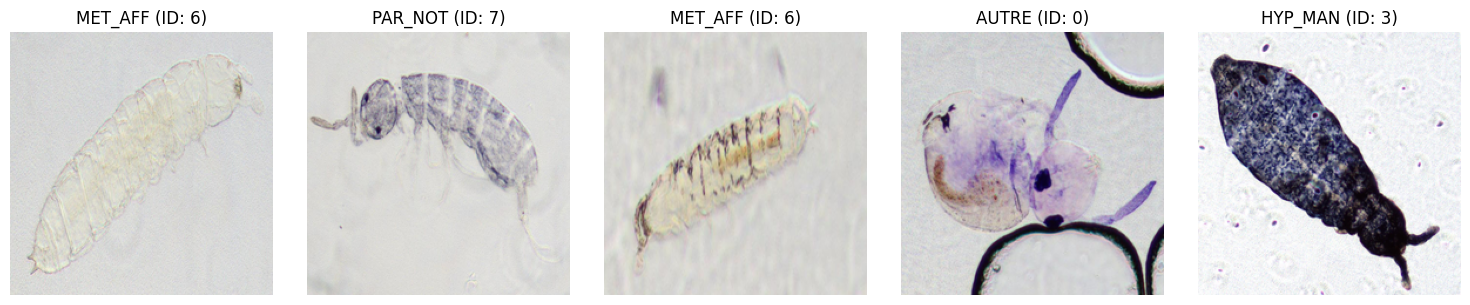

Analyzing expert agreement...
Agreement statistics: {'full_agreement': 1197, 'majority_agreement': 98, 'split_decision': 101, 'total_boxes': 1396, 'full_agreement_pct': 85.74498567335243, 'majority_agreement_pct': 7.020057306590258, 'split_decision_pct': 7.234957020057306}


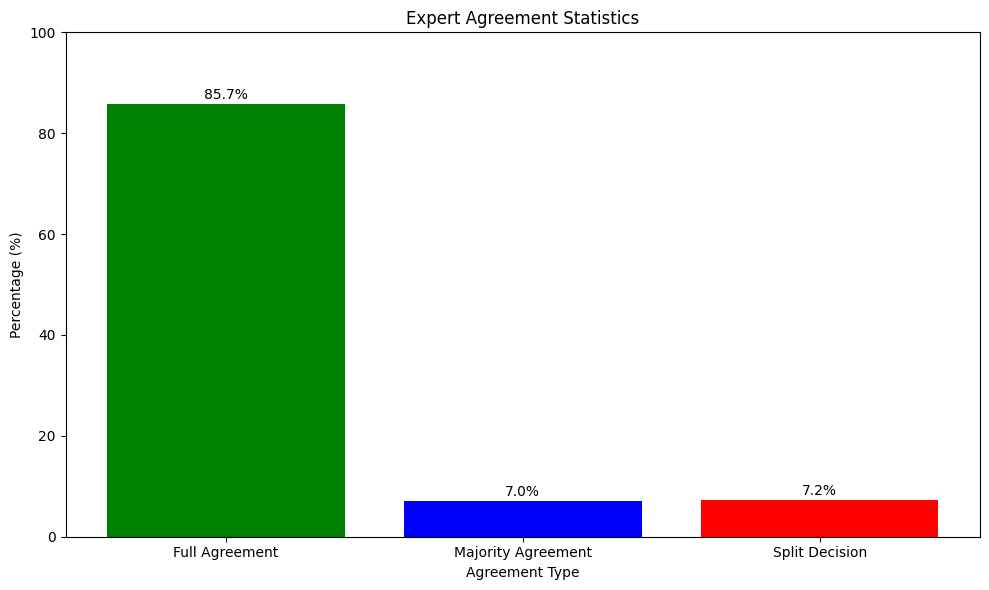

Training set: 402 samples
Validation set: 101 samples


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weight

Training model...


Epoch 1/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/20 - Validation: 100%|██████████| 4/4 [00:08<00:00,  2.05s/it]


Epoch 1/20:
Train Loss: 1.3914, Train F1: 0.3939
Val Loss: 0.8541, Val F1: 0.6439


Epoch 2/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 2/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 2/20:
Train Loss: 0.6430, Train F1: 0.7672
Val Loss: 1.4848, Val F1: 0.5778


Epoch 3/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 3/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 3/20:
Train Loss: 0.4549, Train F1: 0.8390
Val Loss: 0.6832, Val F1: 0.7596


Epoch 4/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 4/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 4/20:
Train Loss: 0.3072, Train F1: 0.8703
Val Loss: 0.7436, Val F1: 0.7633


Epoch 5/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 5/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 5/20:
Train Loss: 0.2471, Train F1: 0.9367
Val Loss: 0.8739, Val F1: 0.6279


Epoch 6/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 6/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 6/20:
Train Loss: 0.3073, Train F1: 0.8903
Val Loss: 0.9813, Val F1: 0.6107


Epoch 7/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 7/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 7/20:
Train Loss: 0.1993, Train F1: 0.9514
Val Loss: 0.9607, Val F1: 0.7545


Epoch 8/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 8/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 8/20:
Train Loss: 0.1502, Train F1: 0.9186
Val Loss: 0.7741, Val F1: 0.7946


Epoch 9/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 9/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freez

Epoch 9/20:
Train Loss: 0.1431, Train F1: 0.9621
Val Loss: 0.7131, Val F1: 0.7130


Epoch 10/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 10/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 10/20:
Train Loss: 0.0835, Train F1: 0.9842
Val Loss: 0.6786, Val F1: 0.7289


Epoch 11/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 11/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 11/20:
Train Loss: 0.0947, Train F1: 0.9787
Val Loss: 0.7107, Val F1: 0.8242


Epoch 12/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 12/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 12/20:
Train Loss: 0.0607, Train F1: 0.9885
Val Loss: 0.7070, Val F1: 0.8415


Epoch 13/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 13/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 13/20:
Train Loss: 0.0554, Train F1: 0.9884
Val Loss: 0.6688, Val F1: 0.8328


Epoch 14/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 14/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 14/20:
Train Loss: 0.0480, Train F1: 0.9824
Val Loss: 0.6276, Val F1: 0.8564


Epoch 15/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 15/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 15/20:
Train Loss: 0.0642, Train F1: 0.9785
Val Loss: 0.6313, Val F1: 0.8505


Epoch 16/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 16/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 16/20:
Train Loss: 0.0390, Train F1: 0.9942
Val Loss: 0.6432, Val F1: 0.8376


Epoch 17/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 17/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 17/20:
Train Loss: 0.0538, Train F1: 0.9860
Val Loss: 0.6038, Val F1: 0.8657


Epoch 18/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 18/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 18/20:
Train Loss: 0.0409, Train F1: 0.9897
Val Loss: 0.6116, Val F1: 0.8527


Epoch 19/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 19/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 19/20:
Train Loss: 0.0411, Train F1: 0.9940
Val Loss: 0.6007, Val F1: 0.8527


Epoch 20/20 - Training:   0%|          | 0/13 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 20/20 - Validation:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fre

Epoch 20/20:
Train Loss: 0.0363, Train F1: 0.9958
Val Loss: 0.6181, Val F1: 0.8617
Evaluating model...


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Evaluating: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]


Overall F1 Score: 0.8617
F1 Score per class:
  AUTRE: 0.7778
  Cer: 0.7692
  CRY_THE: 0.9333
  HYP_MAN: 0.9167
  ISO_MIN: 0.8571
  LEP: 0.8889
  MET_AFF: 0.8889


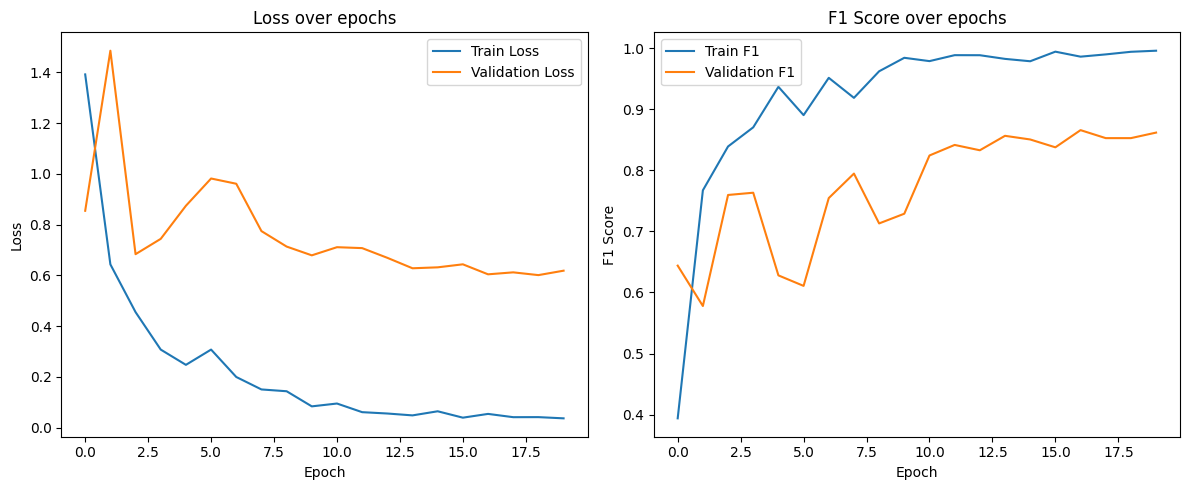

Suggesting label corrections...


Analyzing label disagreements:   0%|          | 0/2234 [00:00<?, ?it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.72829115934607760.7098275186677530.19138456759173417.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:   1%|          | 19/2234 [00:00<00:22, 97.07it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.302524303370539040.66867725705862760.6513656829750563.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:   1%|▏         | 32/2234 [00:00<00:21, 101.83it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.28776347717849950.21859858689486190.7359105488207714.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:   2%|▏         | 51/2234 [00:51<32:18,  1.13it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.378527251110764350.92205731296390860.500357960604366.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:   3%|▎         | 74/2234 [00:51<09:51,  3.65it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.370060293580175670.80556948742926650.271814400046428.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:   4%|▍         | 98/2234 [00:51<03:30, 10.13it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.080926972918332620.31131394324890060.3759346011893129.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:   8%|▊         | 183/2234 [00:53<00:33, 61.57it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.5337566967979110.068315960020432390.6748210087063842.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  10%|█         | 230/2234 [00:53<00:22, 89.43it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.49551114829461440.248660880733342030.2235895156797253.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.088475018755228120.66938887263292270.004506662765696223.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.63079587370999890.0341942127357079960.38718400476828096.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.68067379987673590.8557184341081670.28861792371319495.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76037220914867250.79249613771589410.10786653257102219.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  11%|█         | 245/2234 [00:53<00:19, 100.69it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.486096439637040860.67068010394715240.9832214649194833.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  18%|█▊        | 394/2234 [00:55<00:18, 101.21it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.227249003819710140.78286216702899760.31751011275245566.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.135111386750685460.57206416328635530.14892354778004124.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  20%|█▉        | 438/2234 [00:55<00:19, 91.81it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.52043995015197410.53010412084727620.17965057700881915.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.55592693798219410.0424207763441539760.8267773185120976.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  21%|██        | 469/2234 [00:56<00:23, 74.02it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.43017808775753330.453366517060570850.2080717123268323.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  22%|██▏       | 498/2234 [00:56<00:20, 84.99it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.96942785646957960.41326622822113090.033584617496753455.jpg: could not convert string to float: 'Benjamin'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.335311481026566270.50712371620590190.7976991254996618.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.65404943671548670.18361289392007840.5913843235825991.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  23%|██▎       | 520/2234 [00:56<00:25, 67.71it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.65327452939339850.54179308961383640.387757330267937.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  25%|██▌       | 565/2234 [00:57<00:22, 72.95it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.289432003803388850.69042352212718120.3168442420614087.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.178287055613289060.97569567784275650.030113793072557238.jpg: could not convert string to float: 'Lysimétriques'


Analyzing label disagreements:  27%|██▋       | 600/2234 [00:57<00:17, 94.92it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76325615606014530.90065221257704130.2606263553140763.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  29%|██▊       | 637/2234 [00:58<00:12, 123.55it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.12234735335957480.88889434435939270.42014348825483827.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.97847148781045980.54217695831160420.543019055961344.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.4336936642745910.81487627400629190.021909959747049346.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.28192126145130450.171068479728196280.10683393134627794.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.22707203065615710.173313940865999270.2703052219416524.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  31%|███       | 682/2234 [00:58<00:10, 147.68it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.33023510963647040.67341081268840430.019564698245749912.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.492577899878823940.127125857695008730.8307104917353509.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  32%|███▏      | 715/2234 [00:58<00:13, 114.16it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.26402895558768760.96252679730330.4692720889458746.jpg: could not convert string to float: 'Benjamin'


Analyzing label disagreements:  33%|███▎      | 735/2234 [00:58<00:11, 131.82it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.43637753085098520.41761293904203290.1809565783438386.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.54315005554628360.5883125774946780.27368869185214095.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.62959327540824830.064861203841840580.5070058727376369.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  35%|███▌      | 792/2234 [00:59<00:10, 139.46it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.46525975491414960.28158854494576080.359717440524845.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  38%|███▊      | 842/2234 [00:59<00:09, 151.96it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.50142980224357710.46065392362461120.08520629589654138.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.375602142497771240.210777154283665840.27105109758878154.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76853360466459510.87502751067016960.5531164777108749.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67052617113309250.122448613952089170.21524667188317925.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  42%|████▏     | 949/2234 [01:00<00:08, 145.60it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.210821372159124330.4762091687910820.4489144122430705.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  45%|████▍     | 1005/2234 [01:00<00:09, 123.77it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.84846526919928130.86032470106932960.7666647876281714.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.88363690398151740.7282348290076970.20313276851186102.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.35779427537674080.81838767186087970.3388362023847391.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76978446789817690.81941077582474140.9057164287936901.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.79135198962204660.33825678734424890.11554128836988342.jpg: could not convert string to float: 'Benjamin'


Analyzing label disagreements:  46%|████▋     | 1035/2234 [01:01<00:12, 99.80it/s] 

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.8491812745499310.6520982974713410.9437884174931784.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.116286767928030610.58515916404087230.4439159742434198.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  50%|████▉     | 1108/2234 [01:01<00:08, 138.14it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.185942305937356170.37659853473916550.6502815327053207.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  52%|█████▏    | 1168/2234 [01:02<00:06, 159.36it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.99283287812430950.238644541496487280.643393405984301.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.6686926063034020.235272026546168970.6169697282980431.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.85055763698641360.0113725662496945160.2894824776458538.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.98483406118238130.76418049996971990.9282000283793711.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.58182636738945680.245450574449141650.4491932893266394.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  54%|█████▍    | 1211/2234 [01:02<00:06, 169.82it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81637819389852310.89245304252732370.9434891788834274.jpg: could not convert string to float: 'TQ'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.99427464848396570.60625950202625980.5009928920173499.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.460833210494429050.390377080212403470.36857333601514064.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  55%|█████▌    | 1229/2234 [01:02<00:07, 130.47it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.92618933428750670.58818096283688740.1030710079924797.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.81698060047507250.31334744028114160.2440838531331211.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  57%|█████▋    | 1281/2234 [01:02<00:05, 165.08it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.71965380573540320.86048086247368980.495470718745995.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.5780637930333710.76622556469929230.7892828174305551.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73382397428433550.74171139532127280.7244198794959048.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  62%|██████▏   | 1387/2234 [01:04<00:09, 85.34it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.67097260293569320.54335880605268050.6888754566535953.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.82411205990717310.077954984831434590.8945423286192078.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  64%|██████▍   | 1427/2234 [01:04<00:09, 83.42it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.87640037911891670.64844203927900170.08677364294435141.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.24781841066721710.69197887630539390.7854733553796187.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.48507865847171880.76193057203860570.48285103119496675.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  67%|██████▋   | 1505/2234 [01:05<00:05, 145.17it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.50935519057888360.493314924113490540.9354201824705658.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.112572227739773380.74194201018414960.342109895838669.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  70%|██████▉   | 1562/2234 [01:05<00:04, 158.02it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0405896768105369340.80529571431589990.98491068874135.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.181354331606661030.150895436778867740.4576716151265251.jpg: could not convert string to float: 'RMQS'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.310052343358128370.100486271881957130.15974225841974932.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  73%|███████▎  | 1639/2234 [01:05<00:03, 184.05it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.97859473021351330.0521570135052886740.1835822429778281.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.94552191605666460.55679963836942380.15712198234015395.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  74%|███████▍  | 1663/2234 [01:05<00:02, 197.73it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.76533356465399540.385699442527504540.6614811943033322.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  78%|███████▊  | 1732/2234 [01:06<00:05, 100.38it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.73334826178667290.137668365151602860.5345577106789122.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.55812351315122130.080442621504692390.030150930257876185.jpg: could not convert string to float: 'Biodiv'


Analyzing label disagreements:  78%|███████▊  | 1745/2234 [01:07<00:05, 87.02it/s] 

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.48737911662201650.92957730776167810.28135158595990184.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  81%|████████▏ | 1819/2234 [01:07<00:03, 127.05it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.75599040669159020.9393271599826510.06191818234254365.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.92839004138225090.12596006263544480.9849995147633712.jpg: could not convert string to float: 'Biodiv'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.77851365700556350.385216694741747130.2548138855987847.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  82%|████████▏ | 1837/2234 [01:07<00:02, 137.28it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.51751567027403010.18968457300623910.058934005872009476.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  84%|████████▍ | 1880/2234 [01:08<00:04, 81.75it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.74853189669662480.49370990045529730.9017541037429097.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.043088421917129580.26545563415895370.4068943422470388.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.087601306448350740.160129879976934730.9685882660543307.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  86%|████████▌ | 1919/2234 [01:09<00:03, 85.83it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.99670287684859240.91925559149021340.739464378172899.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  87%|████████▋ | 1944/2234 [01:09<00:02, 113.24it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.70458015123887750.48177866208275310.7312500161293848.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0139003264029883280.045660528110421430.04891106366585152.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.59047921898712230.78580220167763050.5566455518874187.jpg: could not convert string to float: 'Benjamin'


Analyzing label disagreements:  89%|████████▉ | 1985/2234 [01:09<00:02, 93.45it/s] 

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.49602925159863330.20948449011604020.6958365845444278.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  90%|█████████ | 2011/2234 [01:09<00:01, 119.89it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.10557025287916710.46432487368539310.4823918296778429.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56846169956154510.63569577437217270.6414430910567038.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  91%|█████████▏| 2042/2234 [01:10<00:02, 85.22it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.437459971479198240.90663973978687660.7515090866692908.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.64853592890521050.64065822305120210.07914213557255734.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  94%|█████████▍| 2097/2234 [01:11<00:02, 62.08it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.141337738992332040.099403923417354710.1391254591200648.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.346714546148162440.51719769284626160.8143155356376189.jpg: Coordinate 'right' is less than 'left'


Analyzing label disagreements:  95%|█████████▍| 2121/2234 [01:11<00:01, 73.31it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.26959881562627820.96572294193139810.2948998302783541.jpg: could not convert string to float: 'Lysimétriques'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.70828812826169940.267735241134369750.7630786818071725.jpg: Coordinate 'right' is less than 'left'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.137856424086906350.77156090830578530.046632325021449095.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  99%|█████████▊| 2202/2234 [01:12<00:00, 150.50it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.478361542078353130.65529213167573650.19305640611567176.jpg: could not convert string to float: 'Isacs'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.69623016180655250.50041162618330340.6711050788557887.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.015622642061761560.28313681458209760.8810196114986082.jpg: could not convert string to float: '2009/2010'
Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.56313945927621660.000103959852111978890.32598898153324074.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements:  99%|█████████▉| 2219/2234 [01:12<00:00, 153.85it/s]

Error processing /content/drive/MyDrive/Données challenge deep/data/data/0.0128014996016426740.256021255105425060.5962162837850934.jpg: could not convert string to float: '2009/2010'


Analyzing label disagreements: 100%|██████████| 2234/2234 [01:12<00:00, 30.87it/s] 


Found 89 potential corrections
                                               image  line expert_labels  \
0  0.333803482030543440.66164125154173590.1479898...     2       0_0_0_3   
1  0.0407785987787943060.77101671752151930.006602...     2       6_5_5_5   
2  0.0231315486305403440.35788313925761370.140659...     3       8_1_1_1   
3  0.0231315486305403440.35788313925761370.140659...     4       5_5_5_1   
4  0.52035606108421760.99914536199415030.91048190...     4       0_0_0_7   

       expert_votes  majority_label  majority_count  model_prediction  \
0  {'0': 3, '3': 1}               0               3                 4   
1  {'6': 1, '5': 3}               5               3                 0   
2  {'8': 1, '1': 3}               1               3                 1   
3  {'5': 3, '1': 1}               5               3                 1   
4  {'0': 3, '7': 1}               0               3                 0   

   model_confidence                                         box_coords  \

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Predicting test data: 100%|██████████| 42/42 [02:13<00:00,  3.17s/it]

Submission file created: submission.csv
Done!


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# Define constants
CLASS_MAPPING = {
    0: "AUTRE",
    1: "Cer",
    2: "CRY_THE",
    3: "HYP_MAN",
    4: "ISO_MIN",
    5: "LEP",
    6: "MET_AFF",
    7: "PAR_NOT",
    8: "FOND"
}

# 1. Data Preprocessing
class CollemboleDataProcessor:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_files = []
        self.labels_files = []
        self.crops = []
        self.crop_labels = []

    def find_files(self):
        """Find all image and corresponding text files"""
        for file in os.listdir(self.data_dir):
            if file.endswith('.jpg') or file.endswith('.png'):
                img_path = os.path.join(self.data_dir, file)
                txt_path = os.path.join(self.data_dir, os.path.splitext(file)[0] + '.txt')

                if os.path.exists(txt_path):
                    self.image_files.append(img_path)
                    self.labels_files.append(txt_path)

        print(f"Found {len(self.image_files)} images with corresponding label files")

    def parse_label_file(self, label_file):
        """Parse YOLO+ format label file and return bounding boxes with full agreement"""
        boxes = []
        labels = []

        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 6:  # Skip malformed lines
                    continue

                # Extract expert labels
                expert_labels = parts[0].split('_')

                # Check if all experts agree
                if len(set(expert_labels)) == 1:
                    # Get the class ID
                    class_id = int(expert_labels[0])

                    # Extract bounding box: x_center, y_center, width, height
                    x_center = float(parts[2])
                    y_center = float(parts[3])
                    width = float(parts[4])
                    height = float(parts[5])

                    boxes.append([x_center, y_center, width, height])
                    labels.append(class_id)

        return boxes, labels

    def crop_images(self, resize_size=(224, 224)):
        """Extract crops from images using bounding boxes with full agreement"""
        self.find_files()

        for img_path, label_path in tqdm(zip(self.image_files, self.labels_files), total=len(self.image_files)):
            try:
                img = Image.open(img_path)
                img_width, img_height = img.size

                boxes, labels = self.parse_label_file(label_path)

                for box, label in zip(boxes, labels):
                    # Convert relative coordinates to absolute
                    x_center, y_center, width, height = box
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height

                    # Calculate box coordinates
                    x1 = int(x_center - width / 2)
                    y1 = int(y_center - height / 2)
                    x2 = int(x_center + width / 2)
                    y2 = int(y_center + height / 2)

                    # Ensure coordinates are within image bounds
                    x1 = max(0, x1)
                    y1 = max(0, y1)
                    x2 = min(img_width, x2)
                    y2 = min(img_height, y2)

                    # Crop the image
                    crop = img.crop((x1, y1, x2, y2))

                    # Resize the crop
                    crop = crop.resize(resize_size, Image.LANCZOS)

                    self.crops.append(crop)
                    self.crop_labels.append(label)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        print(f"Generated {len(self.crops)} crops")
        return self.crops, self.crop_labels

    def visualize_samples(self, n_samples=5):
        """Visualize random sample crops with their labels"""
        if not self.crops:
            print("No crops available. Run crop_images() first.")
            return

        indices = np.random.choice(len(self.crops), min(n_samples, len(self.crops)), replace=False)

        fig, axes = plt.subplots(1, len(indices), figsize=(15, 3))
        if len(indices) == 1:
            axes = [axes]

        for i, idx in enumerate(indices):
            axes[i].imshow(self.crops[idx])
            label = self.crop_labels[idx]
            class_name = CLASS_MAPPING.get(label, f"Class {label}")
            axes[i].set_title(f"{class_name} (ID: {label})")
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

# 2. Dataset and DataLoader
class CollemboleDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

class TestDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)
                           if f.endswith('.jpg') or f.endswith('.png')]
        self.image_ids = [os.path.splitext(os.path.basename(f))[0] for f in self.image_files]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        image_id = self.image_ids[idx]

        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, image_id

# 3. Model
class CollemboleClassifier(nn.Module):
    def __init__(self, num_classes=9, pretrained=True):
        super(CollemboleClassifier, self).__init__()
        # Use a pre-trained model for faster convergence
        self.model = models.efficientnet_b0(pretrained=pretrained)

        # Replace the final classification layer
        in_features = self.model.classifier[1].in_features
        self.model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# 4. Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, device='cuda'):
    model = model.to(device)
    best_val_f1 = 0.0
    best_model_weights = None

    history = {
        'train_loss': [],
        'val_loss': [],
        'train_f1': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_targets = []

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_preds.extend(preds.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())

        # Calculate epoch statistics
        train_loss = train_loss / len(train_loader.dataset)
        train_f1 = f1_score(train_targets, train_preds, average='macro')

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

        # Calculate epoch statistics
        val_loss = val_loss / len(val_loader.dataset)
        val_f1 = f1_score(val_targets, val_preds, average='macro')

        # Update scheduler
        scheduler.step(val_loss)

        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model_weights = model.state_dict().copy()

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_weights)

    return model, history

# 5. Evaluation and visualization
def evaluate_model(model, dataloader, device='cuda'):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate F1 score
    f1 = f1_score(all_targets, all_preds, average='macro')
    f1_per_class = f1_score(all_targets, all_preds, average=None)

    # Create confusion matrix
    cm = confusion_matrix(all_targets, all_preds)

    return f1, f1_per_class, cm

def plot_confusion_matrix(cm, class_mapping):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[class_mapping[i] for i in range(len(class_mapping))],
                yticklabels=[class_mapping[i] for i in range(len(class_mapping))])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_f1'], label='Train F1')
    plt.plot(history['val_f1'], label='Validation F1')
    plt.title('F1 Score over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. Prediction for test data
def predict_test_data(model, test_loader, device='cuda'):
    model.eval()
    predictions = {}

    with torch.no_grad():
        for inputs, image_ids in tqdm(test_loader, desc="Predicting test data"):
            inputs = inputs.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for img_id, pred in zip(image_ids, preds.cpu().numpy()):
                predictions[img_id] = int(pred)

    return predictions

def create_submission_file(predictions, output_file='submission.csv'):
    with open(output_file, 'w') as f:
        f.write('idx,gt\n')
        for img_id, pred in predictions.items():
            f.write(f'{img_id},{pred}\n')

    print(f"Submission file created: {output_file}")

# 7. Explainability
def analyze_expert_agreement(data_dir):
    """Analyze agreement between experts in the training data"""
    agreement_stats = {
        'full_agreement': 0,
        'majority_agreement': 0,
        'split_decision': 0,
        'total_boxes': 0
    }

    class_distribution = {}

    for file in os.listdir(data_dir):
        if file.endswith('.txt'):
            txt_path = os.path.join(data_dir, file)

            with open(txt_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) < 6:
                        continue

                    agreement_stats['total_boxes'] += 1

                    # Extract expert labels
                    expert_labels = parts[0].split('_')
                    unique_labels = set(expert_labels)

                    # Count occurrences of each label
                    label_counts = {}
                    for label in expert_labels:
                        if label not in label_counts:
                            label_counts[label] = 0
                        label_counts[label] += 1

                    # Find majority label
                    majority_label = max(label_counts.items(), key=lambda x: x[1])[0]

                    # Update statistics
                    if len(unique_labels) == 1:
                        agreement_stats['full_agreement'] += 1

                        # Update class distribution
                        class_id = int(majority_label)
                        if class_id not in class_distribution:
                            class_distribution[class_id] = 0
                        class_distribution[class_id] += 1
                    elif label_counts[majority_label] >= 3:
                        agreement_stats['majority_agreement'] += 1
                    else:
                        agreement_stats['split_decision'] += 1

    # Calculate percentages
    total = agreement_stats['total_boxes']
    agreement_stats['full_agreement_pct'] = agreement_stats['full_agreement'] / total * 100
    agreement_stats['majority_agreement_pct'] = agreement_stats['majority_agreement'] / total * 100
    agreement_stats['split_decision_pct'] = agreement_stats['split_decision'] / total * 100

    # Format class distribution
    class_dist_formatted = {CLASS_MAPPING.get(k, f"Class {k}"): v for k, v in class_distribution.items()}

    return agreement_stats, class_dist_formatted

def plot_agreement_stats(agreement_stats):
    labels = ['Full Agreement', 'Majority Agreement', 'Split Decision']
    values = [
        agreement_stats['full_agreement_pct'],
        agreement_stats['majority_agreement_pct'],
        agreement_stats['split_decision_pct']
    ]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['green', 'blue', 'red'])
    plt.title('Expert Agreement Statistics')
    plt.xlabel('Agreement Type')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)

    for i, v in enumerate(values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

def plot_class_distribution(class_distribution):
    plt.figure(figsize=(12, 6))

    classes = list(class_distribution.keys())
    counts = list(class_distribution.values())

    plt.bar(classes, counts)
    plt.title('Class Distribution (Full Agreement Cases)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    for i, v in enumerate(counts):
        plt.text(i, v + 5, str(v), ha='center')

    plt.tight_layout()
    plt.show()

# 8. Label correction
def suggest_label_corrections(data_dir, model, transform, device='cuda'):
    """Suggest corrections for labels with disagreement using the trained model"""
    model.eval()

    correction_suggestions = []

    for file in tqdm(os.listdir(data_dir), desc="Analyzing label disagreements"):
        if not file.endswith('.txt'):
            continue

        img_file = os.path.splitext(file)[0] + '.jpg'
        img_path = os.path.join(data_dir, img_file)
        txt_path = os.path.join(data_dir, file)

        if not os.path.exists(img_path):
            img_path = os.path.splitext(file)[0] + '.png'
            img_path = os.path.join(data_dir, img_path)

            if not os.path.exists(img_path):
                continue

        # Read the image
        try:
            img = Image.open(img_path)
            img_width, img_height = img.size

            with open(txt_path, 'r') as f:
                for line_idx, line in enumerate(f):
                    parts = line.strip().split()
                    if len(parts) < 6:
                        continue

                    # Extract expert labels
                    expert_labels = parts[0].split('_')
                    unique_labels = set(expert_labels)

                    # Skip if all experts agree
                    if len(unique_labels) == 1:
                        continue

                    # Extract bounding box
                    x_center = float(parts[2])
                    y_center = float(parts[3])
                    width = float(parts[4])
                    height = float(parts[5])

                    # Convert to pixel coordinates
                    x1 = int((x_center - width/2) * img_width)
                    y1 = int((y_center - height/2) * img_height)
                    x2 = int((x_center + width/2) * img_width)
                    y2 = int((y_center + height/2) * img_height)

                    # Ensure coordinates are within image bounds
                    x1 = max(0, x1)
                    y1 = max(0, y1)
                    x2 = min(img_width, x2)
                    y2 = min(img_height, y2)

                    # Crop the image
                    crop = img.crop((x1, y1, x2, y2))

                    # Prepare for model
                    input_tensor = transform(crop).unsqueeze(0).to(device)

                    # Get model prediction
                    with torch.no_grad():
                        output = model(input_tensor)
                        probs = torch.nn.functional.softmax(output, dim=1)
                        confidence, prediction = torch.max(probs, 1)

                        prediction = prediction.item()
                        confidence = confidence.item()

                    # Count expert votes
                    expert_votes = {}
                    for label in expert_labels:
                        if label not in expert_votes:
                            expert_votes[label] = 0
                        expert_votes[label] += 1

                    # Get majority label
                    majority_label = max(expert_votes.items(), key=lambda x: x[1])[0]
                    majority_count = expert_votes[majority_label]

                    correction_suggestions.append({
                        'image': os.path.basename(img_path),
                        'line': line_idx + 1,
                        'expert_labels': '_'.join(expert_labels),
                        'expert_votes': expert_votes,
                        'majority_label': int(majority_label),
                        'majority_count': majority_count,
                        'model_prediction': prediction,
                        'model_confidence': confidence,
                        'box_coords': [x_center, y_center, width, height]
                    })
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    # Convert to DataFrame for easier analysis
    corrections_df = pd.DataFrame(correction_suggestions)

    # Add recommendation
    corrections_df['recommendation'] = corrections_df.apply(
        lambda row: row['model_prediction'] if row['model_confidence'] > 0.8 else row['majority_label'],
        axis=1
    )

    return corrections_df

# 9. Main pipeline
def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Set paths
    train_dir = "/content/drive/MyDrive/Données challenge deep/data/data"
    test_dir = "/content/drive/MyDrive/Données challenge deep/datatest/datatest"

    # 1. Process training data
    print("Processing training data...")
    processor = CollemboleDataProcessor(train_dir)
    crops, labels = processor.crop_images(resize_size=(224, 224))
    processor.visualize_samples(n_samples=5)

    # 2. Analyze expert agreement
    print("Analyzing expert agreement...")
    agreement_stats, class_distribution = analyze_expert_agreement(train_dir)
    print(f"Agreement statistics: {agreement_stats}")
    plot_agreement_stats(agreement_stats)
    plot_class_distribution(class_distribution)

    # 3. Prepare data transforms
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # 4. Create datasets and split into train/val
    # Convert PIL images to numpy arrays for dataset splitting
    X = crops
    y = np.array(labels)

    # Split dataset (80% train, 20% validation)
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Training set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")

    # Create datasets
    train_dataset = CollemboleDataset(X_train, y_train, transform=train_transform)
    val_dataset = CollemboleDataset(X_val, y_val, transform=val_transform)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

    # 5. Initialize model
    model = CollemboleClassifier(num_classes=len(CLASS_MAPPING), pretrained=True)

    # 6. Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    # 7. Train model
    print("Training model...")
    model, history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        num_epochs=20,
        device=device
    )

    # Save model
    torch.save(model.state_dict(), 'collembole_classifier.pth')

    # 8. Evaluate model
    print("Evaluating model...")
    f1, f1_per_class, cm = evaluate_model(model, val_loader, device)

    print(f"Overall F1 Score: {f1:.4f}")
    print("F1 Score per class:")
    for class_id, score in enumerate(f1_per_class):
        class_name = CLASS_MAPPING.get(class_id, f"Class {class_id}")
        print(f"  {class_name}: {score:.4f}")

    plot_confusion_matrix(cm, CLASS_MAPPING)
    plot_training_history(history)

    # 9. Suggest label corrections
    print("Suggesting label corrections...")
    corrections_df = suggest_label_corrections(train_dir, model, val_transform, device)
    print(f"Found {len(corrections_df)} potential corrections")
    print(corrections_df.head())

    # Save corrections
    corrections_df.to_csv('label_corrections.csv', index=False)

    # 10. Predict test data
    print("Predicting test data...")
    test_dataset = TestDataset(test_dir, transform=val_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

    predictions = predict_test_data(model, test_loader, device)
    create_submission_file(predictions, 'submission.csv')

    print("Done!")

if __name__ == "__main__":
    main()

## 2e modèle

- correction pour extraire correctement les coordonnées en prenant les 4 derniers éléments
- ajout de 300 **générations** d'échantillons de la classe "FOND" (8)

Using device: cpu
Processing training data...
Found 1117 images with corresponding label files


100%|██████████| 1117/1117 [01:54<00:00,  9.77it/s]


Generated 1497 crops (including background samples)
Class distribution:
  AUTRE (ID: 0): 414 samples
  Cer (ID: 1): 192 samples
  CRY_THE (ID: 2): 109 samples
  HYP_MAN (ID: 3): 94 samples
  ISO_MIN (ID: 4): 73 samples
  LEP (ID: 5): 128 samples
  MET_AFF (ID: 6): 91 samples
  PAR_NOT (ID: 7): 96 samples
  FOND (ID: 8): 300 samples


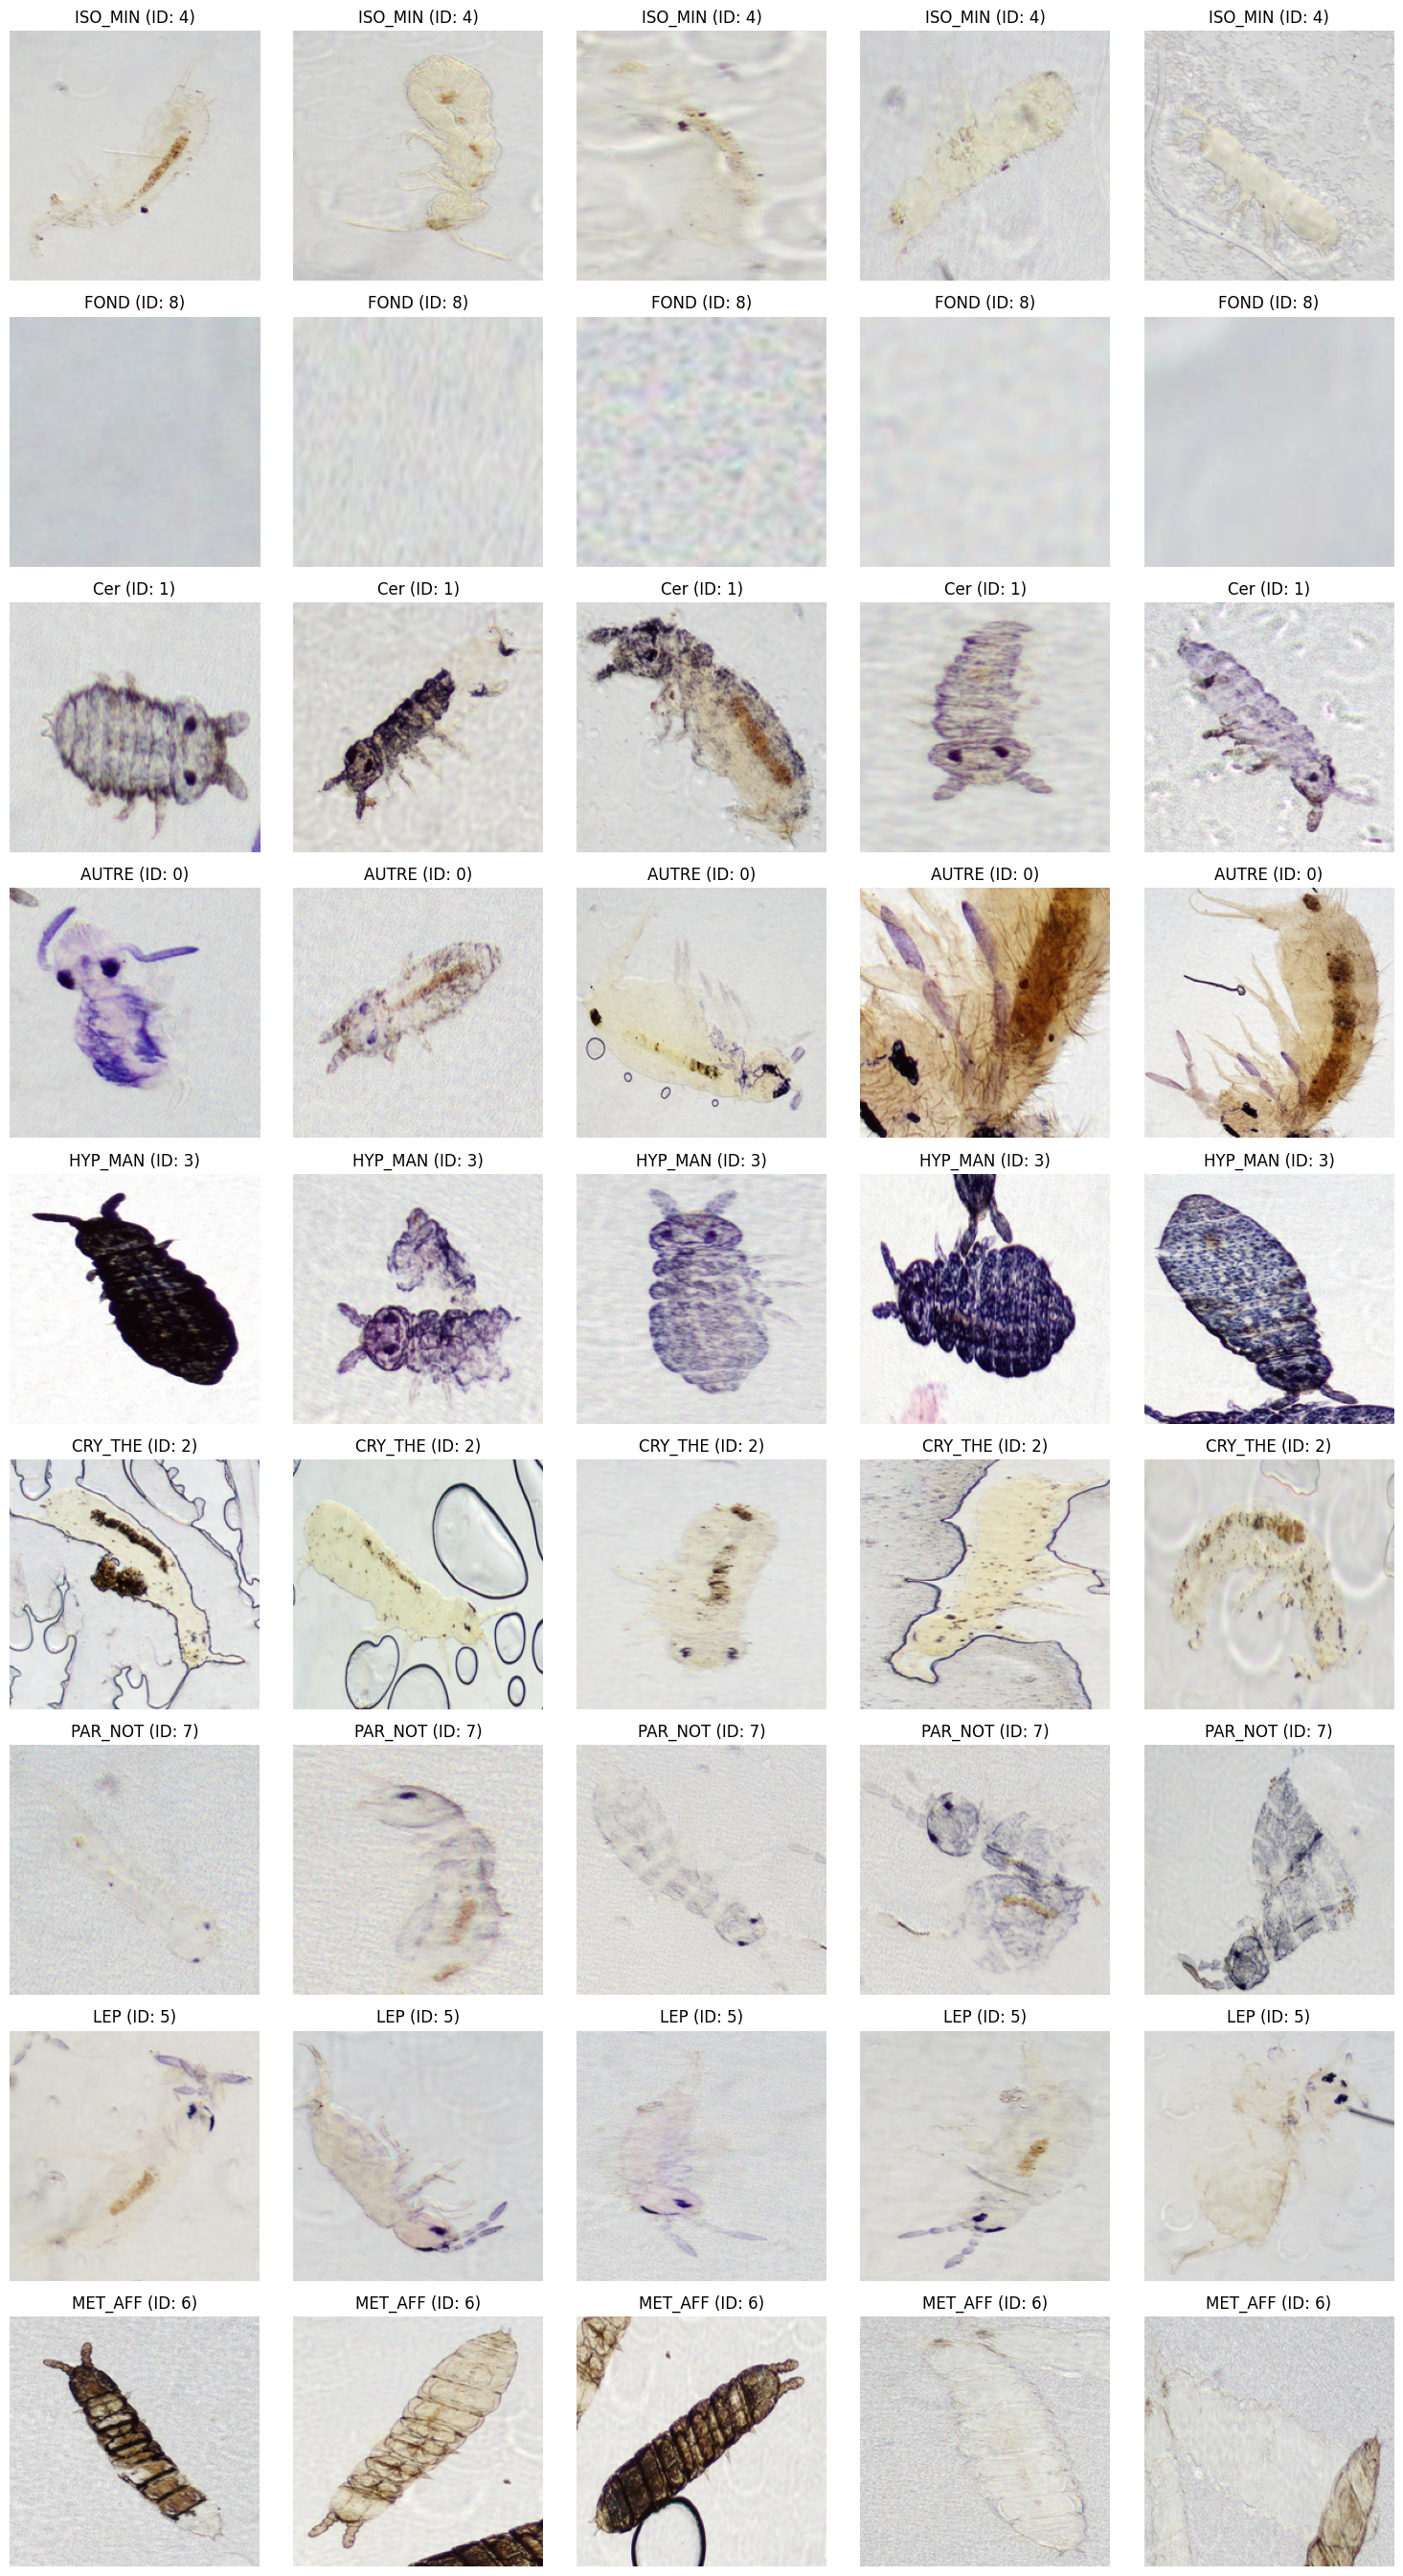

Analyzing expert agreement...
Agreement statistics: {'full_agreement': 1197, 'majority_agreement': 98, 'split_decision': 101, 'total_boxes': 1396, 'full_agreement_pct': 85.74498567335243, 'majority_agreement_pct': 7.020057306590258, 'split_decision_pct': 7.234957020057306}


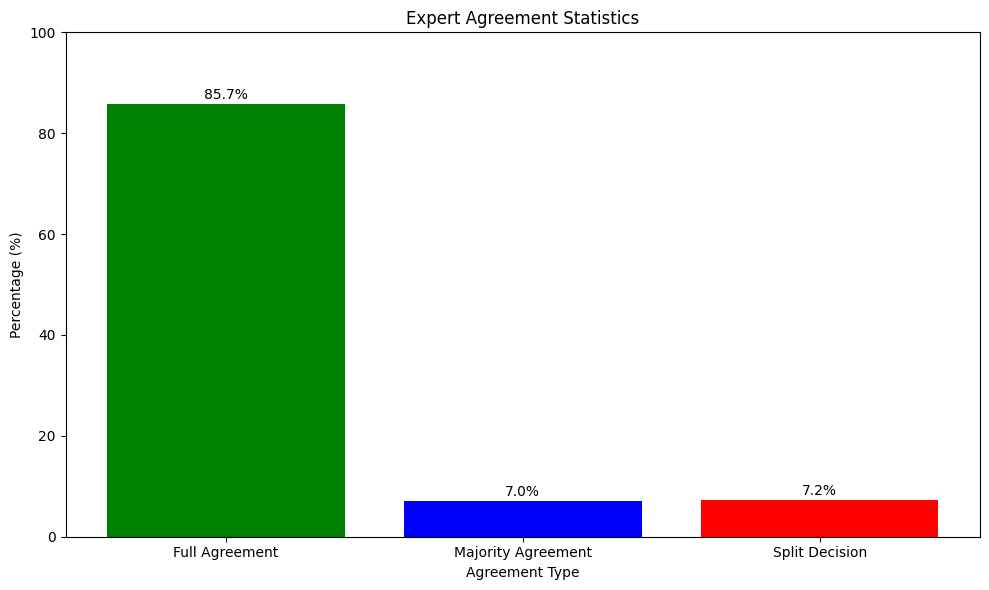

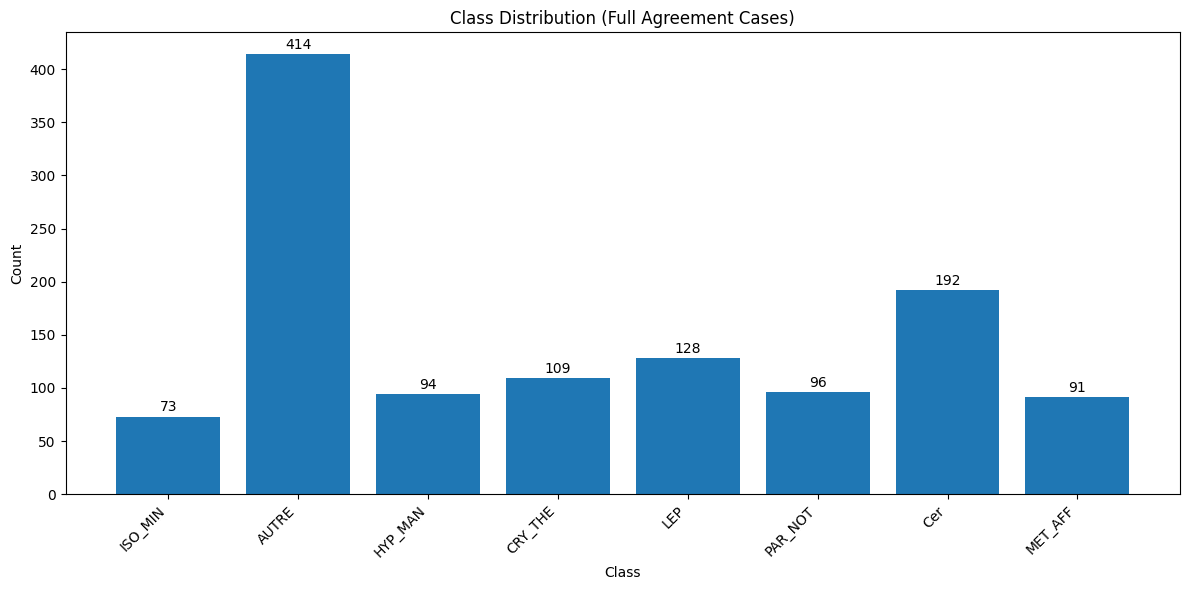

Training set: 1197 samples
Validation set: 300 samples


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weight

Training model...


Epoch 1/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/10 - Validation: 100%|██████████| 10/10 [00:21<00:00,  2.17s/it]


Epoch 1/10:
Train Loss: 1.1510, Train F1: 0.5205
Val Loss: 0.7898, Val F1: 0.6069


Epoch 2/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 2/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 2/10:
Train Loss: 0.6358, Train F1: 0.7362
Val Loss: 0.6969, Val F1: 0.7345


Epoch 3/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 3/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 3/10:
Train Loss: 0.5082, Train F1: 0.7812
Val Loss: 0.5083, Val F1: 0.7853


Epoch 4/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 4/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 4/10:
Train Loss: 0.4072, Train F1: 0.8212
Val Loss: 0.6235, Val F1: 0.7464


Epoch 5/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 5/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 5/10:
Train Loss: 0.3283, Train F1: 0.8809
Val Loss: 0.4712, Val F1: 0.8255


Epoch 6/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 6/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 6/10:
Train Loss: 0.2111, Train F1: 0.9218
Val Loss: 0.5207, Val F1: 0.8191


Epoch 7/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 7/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 7/10:
Train Loss: 0.2116, Train F1: 0.9221
Val Loss: 0.4778, Val F1: 0.8154


Epoch 8/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 8/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 8/10:
Train Loss: 0.2102, Train F1: 0.9295
Val Loss: 0.5592, Val F1: 0.8024


Epoch 9/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 9/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/free

Epoch 9/10:
Train Loss: 0.2260, Train F1: 0.9139
Val Loss: 0.6453, Val F1: 0.8058


Epoch 10/10 - Training:   0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 10/10 - Validation:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/fr

Epoch 10/10:
Train Loss: 0.1483, Train F1: 0.9322
Val Loss: 0.4020, Val F1: 0.8705
Evaluating model...


Evaluating:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Evaluating: 100%|██████████| 10/10 [00:17<00:00,  1.79s/it]


Overall F1 Score: 0.8705
F1 Score per class:
  AUTRE: 0.8242
  Cer: 0.9600
  CRY_THE: 0.8372
  HYP_MAN: 0.9474
  ISO_MIN: 0.7857
  LEP: 0.8750
  MET_AFF: 0.9231
  PAR_NOT: 0.6818
  FOND: 1.0000


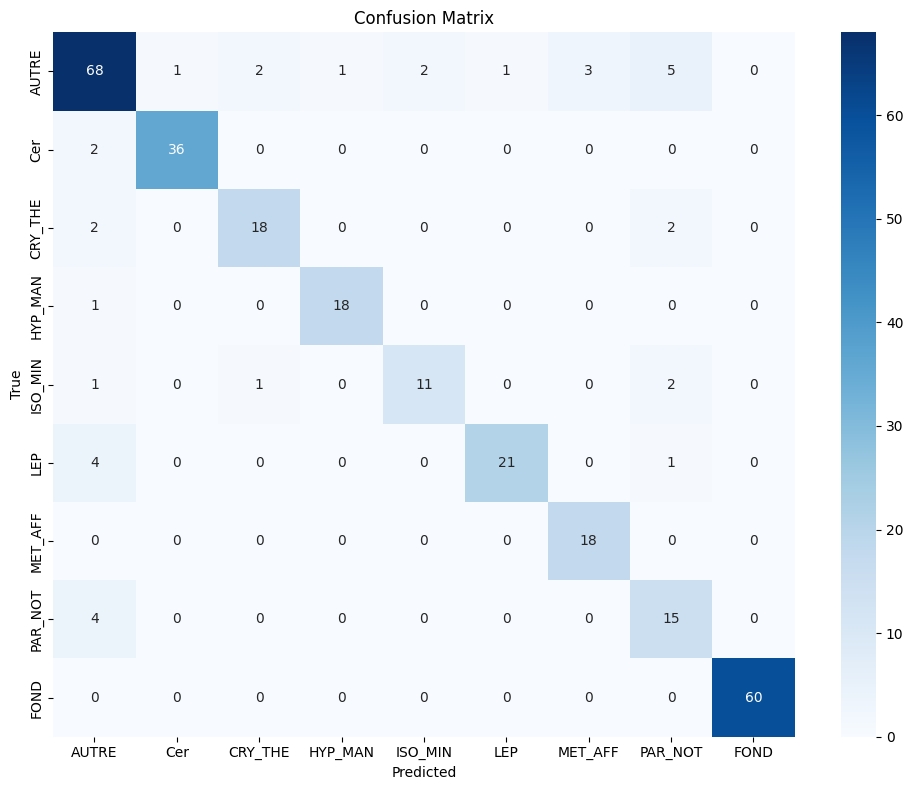

Suggesting label corrections...


Analyzing label disagreements: 100%|██████████| 2234/2234 [01:09<00:00, 32.32it/s]


Found 199 potential corrections
                                               image expert_labels  \
0  0.72829115934607760.7098275186677530.191384567...       8_2_2_8   
1  0.333803482030543440.66164125154173590.1479898...       0_0_0_3   
2  0.302524303370539040.66867725705862760.6513656...       3_0_1_0   
3  0.28776347717849950.21859858689486190.73591054...       1_1_7_1   
4  0.0407785987787943060.77101671752151930.006602...       6_5_5_5   

  majority_class model_class  model_confidence  recommendation  
0           FOND     CRY_THE          0.895851               2  
1          AUTRE       AUTRE          0.637300               0  
2          AUTRE       AUTRE          0.999947               0  
3            Cer         Cer          0.999922               1  
4            LEP       AUTRE          0.984511               0  


Predicting test data...


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Predicting test data: 100%|██████████| 42/42 [01:39<00:00,  2.36s/it]

Submission file created: submission.csv
Done!


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
from tqdm import tqdm

# Define constants
CLASS_MAPPING = {
    0: "AUTRE",
    1: "Cer",
    2: "CRY_THE",
    3: "HYP_MAN",
    4: "ISO_MIN",
    5: "LEP",
    6: "MET_AFF",
    7: "PAR_NOT",
    8: "FOND"
}

# 1. Data Preprocessing
class CollemboleDataProcessor:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_files = []
        self.labels_files = []
        self.crops = []
        self.crop_labels = []

    def find_files(self):
        """Find all image and corresponding text files"""
        for file in os.listdir(self.data_dir):
            if file.endswith('.jpg') or file.endswith('.png'):
                img_path = os.path.join(self.data_dir, file)
                txt_path = os.path.join(self.data_dir, os.path.splitext(file)[0] + '.txt')

                if os.path.exists(txt_path):
                    self.image_files.append(img_path)
                    self.labels_files.append(txt_path)

        print(f"Found {len(self.image_files)} images with corresponding label files")

    def parse_label_file(self, label_file):
        """Parse YOLO+ format label file and return bounding boxes with full agreement"""
        boxes = []
        labels = []

        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()

                # Vérifier qu'il y a au moins 5 parties (labels + 4 coordonnées)
                if len(parts) < 5:
                    continue

                # Le premier élément contient toujours les labels des experts
                expert_labels = parts[0].split('_')

                # Vérifier si tous les experts sont d'accord
                if len(set(expert_labels)) == 1:
                    # Récupérer la classe
                    class_id = int(expert_labels[0])

                    # Les 4 derniers éléments sont toujours les coordonnées
                    try:
                        # Essayer de convertir les 4 derniers éléments en flottants
                        x_center = float(parts[-4])
                        y_center = float(parts[-3])
                        width = float(parts[-2])
                        height = float(parts[-1])

                        # Vérifier que les valeurs sont dans des plages raisonnables
                        if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 < width <= 1 and 0 < height <= 1:
                            boxes.append([x_center, y_center, width, height])
                            labels.append(class_id)
                        else:
                            print(f"Valeurs de coordonnées hors limites: {parts[-4:]} dans {label_file}")
                    except ValueError:
                        # Les 4 derniers éléments ne sont pas des nombres
                        print(f"Impossible de convertir les coordonnées en nombres: {parts[-4:]} dans {label_file}")

        return boxes, labels

    def generate_background_samples(self, image_file, boxes, num_samples=3, min_size=64, max_size=224):
        """Génère des échantillons de fond (FOND) qui ne chevauchent pas les boîtes existantes"""
        try:
            img = Image.open(image_file)
            img_width, img_height = img.size

            # Convertir les coordonnées relatives en absolues pour toutes les boîtes
            abs_boxes = []
            for box in boxes:
                x_center, y_center, width, height = box
                x1 = int((x_center - width/2) * img_width)
                y1 = int((y_center - height/2) * img_height)
                x2 = int((x_center + width/2) * img_width)
                y2 = int((y_center + height/2) * img_height)
                abs_boxes.append((x1, y1, x2, y2))

            background_crops = []
            attempts = 0
            max_attempts = 50  # Évite les boucles infinies

            while len(background_crops) < num_samples and attempts < max_attempts:
                attempts += 1

                # Taille aléatoire entre min_size et max_size
                crop_width = np.random.randint(min_size, min(max_size, img_width//2))
                crop_height = np.random.randint(min_size, min(max_size, img_height//2))

                # Position aléatoire
                x1 = np.random.randint(0, img_width - crop_width)
                y1 = np.random.randint(0, img_height - crop_height)
                x2 = x1 + crop_width
                y2 = y1 + crop_height

                # Vérifie si ce crop chevauche une boîte existante
                overlap = False
                for box_x1, box_y1, box_x2, box_y2 in abs_boxes:
                    if not (x2 < box_x1 or x1 > box_x2 or y2 < box_y1 or y1 > box_y2):
                        overlap = True
                        break

                # Si pas de chevauchement, ajouter comme échantillon de fond
                if not overlap:
                    crop = img.crop((x1, y1, x2, y2))
                    crop = crop.resize((224, 224), Image.LANCZOS)
                    background_crops.append(crop)

            return background_crops
        except Exception as e:
            print(f"Erreur lors de la génération d'échantillons de fond: {e}")
            return []

    def crop_images(self, resize_size=(224, 224)):
        """Extract crops from images using bounding boxes with full agreement and generate background samples"""
        self.find_files()

        for img_path, label_path in tqdm(zip(self.image_files, self.labels_files), total=len(self.image_files)):
            try:
                img = Image.open(img_path)
                img_width, img_height = img.size

                boxes, labels = self.parse_label_file(label_path)

                for box, label in zip(boxes, labels):
                    # Convert relative coordinates to absolute
                    x_center, y_center, width, height = box
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height

                    # Vérifier que width et height sont positifs
                    if width <= 0 or height <= 0:
                        continue

                    # Calculate box coordinates
                    x1 = int(x_center - width / 2)
                    y1 = int(y_center - height / 2)
                    x2 = int(x_center + width / 2)
                    y2 = int(y_center + height / 2)

                    # Ensure coordinates are within image bounds
                    x1 = max(0, x1)
                    y1 = max(0, y1)
                    x2 = min(img_width, x2)
                    y2 = min(img_height, y2)

                    # S'assurer que x2 > x1 et y2 > y1
                    if x2 <= x1 or y2 <= y1:
                        continue

                    # Crop the image
                    crop = img.crop((x1, y1, x2, y2))

                    # Resize the crop
                    crop = crop.resize(resize_size, Image.LANCZOS)

                    self.crops.append(crop)
                    self.crop_labels.append(label)

                # Ne générer des échantillons de fond que pour certaines images
                # Limiter le nombre total d'échantillons de fond à environ 300
                if len(self.crop_labels) > 0 and self.crop_labels.count(8) < 300:
                    # Générer aléatoirement 0 ou 1 échantillon avec une probabilité de 0.3
                    if np.random.random() < 0.3:
                        bg_samples = self.generate_background_samples(img_path, boxes, num_samples=1)
                        for bg_sample in bg_samples:
                            self.crops.append(bg_sample)
                            self.crop_labels.append(8)  # Classe 8 = FOND

            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        print(f"Generated {len(self.crops)} crops (including background samples)")

        # Afficher la distribution des classes
        unique_labels, counts = np.unique(self.crop_labels, return_counts=True)
        print("Class distribution:")
        for label, count in zip(unique_labels, counts):
            class_name = CLASS_MAPPING.get(label, f"Class {label}")
            print(f"  {class_name} (ID: {label}): {count} samples")

        return self.crops, self.crop_labels

    def visualize_samples(self, n_samples=5):
        """Visualize random sample crops with their labels"""
        if not self.crops:
            print("No crops available. Run crop_images() first.")
            return

        # Sélectionner des échantillons de chaque classe si possible
        samples_by_class = {}
        for i, label in enumerate(self.crop_labels):
            if label not in samples_by_class:
                samples_by_class[label] = []
            if len(samples_by_class[label]) < n_samples:
                samples_by_class[label].append(i)

        # Créer une liste de tous les échantillons à visualiser
        all_samples = []
        for label, samples in samples_by_class.items():
            all_samples.extend(samples[:min(n_samples, len(samples))])

        # Si trop d'échantillons, sélectionner aléatoirement
        if len(all_samples) > n_samples * len(samples_by_class):
            all_samples = np.random.choice(all_samples, n_samples * len(samples_by_class), replace=False)

        # Créer la figure
        n_cols = min(5, len(all_samples))
        n_rows = (len(all_samples) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
        axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

        for i, idx in enumerate(all_samples):
            if i < len(axes):
                axes[i].imshow(self.crops[idx])
                label = self.crop_labels[idx]
                class_name = CLASS_MAPPING.get(label, f"Class {label}")
                axes[i].set_title(f"{class_name} (ID: {label})")
                axes[i].axis('off')

        # Masquer les axes inutilisés
        for i in range(len(all_samples), len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

# 2. Dataset and DataLoader
class CollemboleDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

class TestDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)
                           if f.endswith('.jpg') or f.endswith('.png')]
        self.image_ids = [os.path.splitext(os.path.basename(f))[0] for f in self.image_files]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        image_id = self.image_ids[idx]

        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, image_id

# 3. Model
class CollemboleClassifier(nn.Module):
    def __init__(self, num_classes=9, pretrained=True):
        super(CollemboleClassifier, self).__init__()
        # Use a pre-trained model for faster convergence
        self.model = models.efficientnet_b0(pretrained=pretrained)

        # Replace the final classification layer
        in_features = self.model.classifier[1].in_features
        self.model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# 4. Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, device='cuda'):
    model = model.to(device)
    best_val_f1 = 0.0
    best_model_weights = None

    history = {
        'train_loss': [],
        'val_loss': [],
        'train_f1': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_targets = []

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_preds.extend(preds.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())

        # Calculate epoch statistics
        train_loss = train_loss / len(train_loader.dataset)
        train_f1 = f1_score(train_targets, train_preds, average='macro')

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

        # Calculate epoch statistics
        val_loss = val_loss / len(val_loader.dataset)
        val_f1 = f1_score(val_targets, val_preds, average='macro')

        # Update scheduler
        scheduler.step(val_loss)

        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model_weights = model.state_dict().copy()

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_weights)

    return model, history

# 5. Evaluation and visualization
def evaluate_model(model, dataloader, device='cuda'):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate F1 score
    f1 = f1_score(all_targets, all_preds, average='macro')
    f1_per_class = f1_score(all_targets, all_preds, average=None)

    # Create confusion matrix
    cm = confusion_matrix(all_targets, all_preds)

    return f1, f1_per_class, cm

def plot_confusion_matrix(cm, class_mapping):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[class_mapping[i] for i in range(len(class_mapping))],
                yticklabels=[class_mapping[i] for i in range(len(class_mapping))])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_f1'], label='Train F1')
    plt.plot(history['val_f1'], label='Validation F1')
    plt.title('F1 Score over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. Prediction for test data
def predict_test_data(model, test_loader, device='cuda'):
    model.eval()
    predictions = {}
    all_probs = {}  # Pour stocker les probabilités

    with torch.no_grad():
        for inputs, image_ids in tqdm(test_loader, desc="Predicting test data"):
            inputs = inputs.to(device)

            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(probs, 1)

            for img_id, pred, prob in zip(image_ids, preds.cpu().numpy(), probs.cpu().numpy()):
                predictions[img_id] = int(pred)
                all_probs[img_id] = prob  # Stocker les probabilités pour tous les modèles

    return predictions, all_probs

def create_submission_file(predictions, output_file='submission.csv'):
    with open(output_file, 'w') as f:
        f.write('idx,gt\n')
        for img_id, pred in predictions.items():
            f.write(f'{img_id},{pred}\n')

    print(f"Submission file created: {output_file}")

# 7. Explainability
def analyze_expert_agreement(data_dir):
    """Analyze agreement between experts in the training data"""
    agreement_stats = {
        'full_agreement': 0,
        'majority_agreement': 0,
        'split_decision': 0,
        'total_boxes': 0
    }

    class_distribution = {}
    agreement_by_class = {}  # Distribution des accords par classe

    for file in os.listdir(data_dir):
        if file.endswith('.txt'):
            txt_path = os.path.join(data_dir, file)

            with open(txt_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) < 5:
                        continue

                    agreement_stats['total_boxes'] += 1

                    # Extract expert labels
                    expert_labels = parts[0].split('_')
                    unique_labels = set(expert_labels)

                    # Count occurrences of each label
                    label_counts = {}
                    for label in expert_labels:
                        if label not in label_counts:
                            label_counts[label] = 0
                        label_counts[label] += 1

                    # Find majority label
                    majority_label = max(label_counts.items(), key=lambda x: x[1])[0]
                    majority_count = label_counts[majority_label]

                    # Update statistics
                    if len(unique_labels) == 1:
                        agreement_stats['full_agreement'] += 1

                        # Update class distribution
                        class_id = int(majority_label)
                        if class_id not in class_distribution:
                            class_distribution[class_id] = 0
                        class_distribution[class_id] += 1

                        # Mettre à jour les statistiques d'accord par classe
                        if class_id not in agreement_by_class:
                            agreement_by_class[class_id] = {
                                'full': 0, 'majority': 0, 'split': 0, 'total': 0
                            }
                        agreement_by_class[class_id]['full'] += 1
                        agreement_by_class[class_id]['total'] += 1

                    elif majority_count >= 3:
                        agreement_stats['majority_agreement'] += 1

                        # Mettre à jour les statistiques d'accord par classe
                        class_id = int(majority_label)
                        if class_id not in agreement_by_class:
                            agreement_by_class[class_id] = {
                                'full': 0, 'majority': 0, 'split': 0, 'total': 0
                            }
                        agreement_by_class[class_id]['majority'] += 1
                        agreement_by_class[class_id]['total'] += 1

                    else:
                        agreement_stats['split_decision'] += 1

                        # Mettre à jour les statistiques d'accord par classe
                        class_id = int(majority_label)
                        if class_id not in agreement_by_class:
                            agreement_by_class[class_id] = {
                                'full': 0, 'majority': 0, 'split': 0, 'total': 0
                            }
                        agreement_by_class[class_id]['split'] += 1
                        agreement_by_class[class_id]['total'] += 1

    # Calculate percentages
    total = agreement_stats['total_boxes']
    agreement_stats['full_agreement_pct'] = agreement_stats['full_agreement'] / total * 100
    agreement_stats['majority_agreement_pct'] = agreement_stats['majority_agreement'] / total * 100
    agreement_stats['split_decision_pct'] = agreement_stats['split_decision'] / total * 100

    # Format class distribution
    class_dist_formatted = {CLASS_MAPPING.get(k, f"Class {k}"): v for k, v in class_distribution.items()}

    # Formater les statistiques d'accord par classe
    agreement_by_class_formatted = {}
    for class_id, stats in agreement_by_class.items():
        class_name = CLASS_MAPPING.get(class_id, f"Class {class_id}")
        agreement_by_class_formatted[class_name] = {
            'full': stats['full'],
            'majority': stats['majority'],
            'split': stats['split'],
            'total': stats['total'],
            'full_pct': stats['full'] / stats['total'] * 100 if stats['total'] > 0 else 0,
            'majority_pct': stats['majority'] / stats['total'] * 100 if stats['total'] > 0 else 0,
            'split_pct': stats['split'] / stats['total'] * 100 if stats['total'] > 0 else 0
        }

    return agreement_stats, class_dist_formatted, agreement_by_class_formatted

def plot_agreement_stats(agreement_stats):
    labels = ['Full Agreement', 'Majority Agreement', 'Split Decision']
    values = [
        agreement_stats['full_agreement_pct'],
        agreement_stats['majority_agreement_pct'],
        agreement_stats['split_decision_pct']
    ]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['green', 'blue', 'red'])
    plt.title('Expert Agreement Statistics')
    plt.xlabel('Agreement Type')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)

    for i, v in enumerate(values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

def plot_class_distribution(class_distribution):
    plt.figure(figsize=(12, 6))

    classes = list(class_distribution.keys())
    counts = list(class_distribution.values())

    plt.bar(classes, counts)
    plt.title('Class Distribution (Full Agreement Cases)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    for i, v in enumerate(counts):
        plt.text(i, v + 5, str(v), ha='center')

    plt.tight_layout()
    plt.show()

def plot_agreement_by_class(agreement_by_class):
    """Visualiser les statistiques d'accord pour chaque classe"""
    classes = list(agreement_by_class.keys())
    full_agreement = [stats['full_pct'] for stats in agreement_by_class.values()]
    majority_agreement = [stats['majority_pct'] for stats in agreement_by_class.values()]
    split_decision = [stats['split_pct'] for stats in agreement_by_class.values()]

    plt.figure(figsize=(14, 8))

    x = np.arange(len(classes))
    width = 0.25

    plt.bar(x - width, full_agreement, width, label='Full Agreement', color='green')
    plt.bar(x, majority_agreement, width, label='Majority Agreement', color='blue')
    plt.bar(x + width, split_decision, width, label='Split Decision', color='red')

    plt.title('Expert Agreement by Class')
    plt.xlabel('Class')
    plt.ylabel('Percentage (%)')
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 8. Label correction
def suggest_label_corrections(data_dir, model, transform, device='cuda'):
    """Suggest corrections for labels with disagreement using the trained model"""
    model.eval()

    correction_suggestions = []

    for file in tqdm(os.listdir(data_dir), desc="Analyzing label disagreements"):
        if not file.endswith('.txt'):
            continue

        img_file = os.path.splitext(file)[0] + '.jpg'
        img_path = os.path.join(data_dir, img_file)
        txt_path = os.path.join(data_dir, file)

        if not os.path.exists(img_path):
            img_file = os.path.splitext(file)[0] + '.png'
            img_path = os.path.join(data_dir, img_file)

            if not os.path.exists(img_path):
                continue

        # Read the image
        try:
            img = Image.open(img_path)
            img_width, img_height = img.size

            with open(txt_path, 'r') as f:
                for line_idx, line in enumerate(f):
                    parts = line.strip().split()
                    if len(parts) < 5:
                        continue

                    # Extract expert labels
                    expert_labels = parts[0].split('_')
                    unique_labels = set(expert_labels)

                    # Skip if all experts agree
                    if len(unique_labels) == 1:
                        continue

                    try:
                        # Extract bounding box (4 derniers éléments)
                        x_center = float(parts[-4])
                        y_center = float(parts[-3])
                        width = float(parts[-2])
                        height = float(parts[-1])

                        # Vérifier que les valeurs sont dans des plages raisonnables
                        if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 < width <= 1 and 0 < height <= 1):
                            print(f"Valeurs de coordonnées hors limites: {parts[-4:]} dans {txt_path}")
                            continue

                        # Convert to pixel coordinates
                        x1 = int((x_center - width/2) * img_width)
                        y1 = int((y_center - height/2) * img_height)
                        x2 = int((x_center + width/2) * img_width)
                        y2 = int((y_center + height/2) * img_height)

                        # Ensure coordinates are within image bounds
                        x1 = max(0, x1)
                        y1 = max(0, y1)
                        x2 = min(img_width, x2)
                        y2 = min(img_height, y2)

                        # S'assurer que x2 > x1 et y2 > y1
                        if x2 <= x1 or y2 <= y1:
                            continue

                        # Crop the image
                        crop = img.crop((x1, y1, x2, y2))

                        # Prepare for model
                        input_tensor = transform(crop).unsqueeze(0).to(device)

                        # Get model prediction
                        with torch.no_grad():
                            output = model(input_tensor)
                            probs = torch.nn.functional.softmax(output, dim=1)
                            confidence, prediction = torch.max(probs, 1)

                            prediction = prediction.item()
                            confidence = confidence.item()

                        # Count expert votes
                        expert_votes = {}
                        for label in expert_labels:
                            if label not in expert_votes:
                                expert_votes[label] = 0
                            expert_votes[label] += 1

                        # Get majority label
                        majority_label = max(expert_votes.items(), key=lambda x: x[1])[0]
                        majority_count = expert_votes[majority_label]

                        correction_suggestions.append({
                            'image': os.path.basename(img_path),
                            'line': line_idx + 1,
                            'expert_labels': '_'.join(expert_labels),
                            'expert_votes': expert_votes,
                            'majority_label': int(majority_label),
                            'majority_count': majority_count,
                            'model_prediction': prediction,
                            'model_confidence': confidence,
                            'box_coords': [x_center, y_center, width, height]
                        })
                    except Exception as e:
                        print(f"Erreur lors du traitement d'une ligne dans {txt_path}: {e}")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    # Convert to DataFrame for easier analysis
    corrections_df = pd.DataFrame(correction_suggestions)

    # Add recommendation based on model confidence
    corrections_df['recommendation'] = corrections_df.apply(
        lambda row: row['model_prediction'] if row['model_confidence'] > 0.8 else row['majority_label'],
        axis=1
    )

    # Ajouter des informations sur les classes
    corrections_df['majority_class'] = corrections_df['majority_label'].apply(
        lambda x: CLASS_MAPPING.get(x, f"Class {x}")
    )
    corrections_df['model_class'] = corrections_df['model_prediction'].apply(
        lambda x: CLASS_MAPPING.get(x, f"Class {x}")
    )

    return corrections_df

def visualize_correction_examples(data_dir, corrections_df, n_samples=5):
    """Visualise quelques exemples de corrections suggérées"""
    # Sélectionner aléatoirement des exemples
    if len(corrections_df) <= n_samples:
        samples = corrections_df
    else:
        samples = corrections_df.sample(n_samples)

    fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))
    if n_samples == 1:
        axes = [axes]

    for i, (_, row) in enumerate(samples.iterrows()):
        if i >= len(axes):
            break

        img_file = row['image']
        img_path = os.path.join(data_dir, img_file)

        # Vérifier si l'image existe
        if not os.path.exists(img_path):
            continue

        try:
            img = Image.open(img_path)
            img_width, img_height = img.size

            # Extraire les coordonnées de la boîte
            x_center, y_center, width, height = row['box_coords']

            # Convertir en pixels
            x1 = int((x_center - width/2) * img_width)
            y1 = int((y_center - height/2) * img_height)
            x2 = int((x_center + width/2) * img_width)
            y2 = int((y_center + height/2) * img_height)

            # S'assurer que les coordonnées sont dans les limites de l'image
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(img_width, x2)
            y2 = min(img_height, y2)

            # Extraire la région
            crop = img.crop((x1, y1, x2, y2))

            # Afficher l'image
            axes[i].imshow(crop)
            axes[i].set_title(f"Experts: {row['expert_labels']}\nMaj: {row['majority_class']}\nModel: {row['model_class']} ({row['model_confidence']:.2f})")
            axes[i].axis('off')
        except Exception as e:
            print(f"Error visualizing {img_file}: {e}")

    plt.tight_layout()
    plt.show()

# 9. Main pipeline
def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Set paths
    train_dir = "/content/drive/MyDrive/Données challenge deep/data/data"
    test_dir = "/content/drive/MyDrive/Données challenge deep/datatest/datatest"

    # 1. Process training data
    print("Processing training data...")
    processor = CollemboleDataProcessor(train_dir)
    crops, labels = processor.crop_images(resize_size=(224, 224))
    processor.visualize_samples(n_samples=5)

    # 2. Analyze expert agreement
    print("Analyzing expert agreement...")
    agreement_stats, class_distribution, agreement_by_class = analyze_expert_agreement(train_dir)
    print(f"Agreement statistics: {agreement_stats}")
    plot_agreement_stats(agreement_stats)
    plot_class_distribution(class_distribution)
    plot_agreement_by_class(agreement_by_class)

    # 3. Prepare data transforms
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # 4. Create datasets and split into train/val
    # Convert PIL images to numpy arrays for dataset splitting
    X = crops
    y = np.array(labels)

    # Split dataset (80% train, 20% validation)
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Training set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")

    # Create datasets
    train_dataset = CollemboleDataset(X_train, y_train, transform=train_transform)
    val_dataset = CollemboleDataset(X_val, y_val, transform=val_transform)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

    # 5. Initialize model
    model = CollemboleClassifier(num_classes=len(CLASS_MAPPING), pretrained=True)

    # 6. Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    # 7. Train model
    print("Training model...")
    model, history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        num_epochs=10,
        device=device
    )

    # Save model
    torch.save(model.state_dict(), 'collembole_classifier.pth')

    # 8. Evaluate model
    print("Evaluating model...")
    f1, f1_per_class, cm = evaluate_model(model, val_loader, device)

    print(f"Overall F1 Score: {f1:.4f}")
    print("F1 Score per class:")
    for class_id, score in enumerate(f1_per_class):
        class_name = CLASS_MAPPING.get(class_id, f"Class {class_id}")
        print(f"  {class_name}: {score:.4f}")

    plot_confusion_matrix(cm, CLASS_MAPPING)
    plot_training_history(history)

    # 9. Suggest label corrections
    print("Suggesting label corrections...")
    corrections_df = suggest_label_corrections(train_dir, model, val_transform, device)
    print(f"Found {len(corrections_df)} potential corrections")
    print(corrections_df[['image', 'expert_labels', 'majority_class', 'model_class', 'model_confidence', 'recommendation']].head())

    # Visualiser quelques exemples de corrections suggérées
    visualize_correction_examples(train_dir, corrections_df, n_samples=5)

    # Save corrections
    corrections_df.to_csv('label_corrections.csv', index=False)

    # 10. Predict test data
    print("Predicting test data...")
    test_dataset = TestDataset(test_dir, transform=val_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

    predictions, all_probs = predict_test_data(model, test_loader, device)
    create_submission_file(predictions, 'submission.csv')

    print("Done!")

if __name__ == "__main__":
    main()

## 3e modele
- équilibre des classes

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageEnhance
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
from tqdm import tqdm
import random

# Define constants
CLASS_MAPPING = {
    0: "AUTRE",
    1: "Cer",
    2: "CRY_THE",
    3: "HYP_MAN",
    4: "ISO_MIN",
    5: "LEP",
    6: "MET_AFF",
    7: "PAR_NOT",
    8: "FOND"
}

# 1. Data Preprocessing
class CollemboleDataProcessor:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_files = []
        self.labels_files = []
        self.crops = []
        self.crop_labels = []

    def find_files(self):
        """Find all image and corresponding text files"""
        for file in os.listdir(self.data_dir):
            if file.endswith('.jpg') or file.endswith('.png'):
                img_path = os.path.join(self.data_dir, file)
                txt_path = os.path.join(self.data_dir, os.path.splitext(file)[0] + '.txt')

                if os.path.exists(txt_path):
                    self.image_files.append(img_path)
                    self.labels_files.append(txt_path)

        print(f"Found {len(self.image_files)} images with corresponding label files")

    def parse_label_file(self, label_file):
        """Parse YOLO+ format label file and return bounding boxes with full agreement"""
        boxes = []
        labels = []

        with open(label_file, 'r') as f:
            for line in f:
                parts = line.strip().split()

                # Vérifier qu'il y a au moins 5 parties (labels + 4 coordonnées)
                if len(parts) < 5:
                    continue

                # Le premier élément contient toujours les labels des experts
                expert_labels = parts[0].split('_')

                # Vérifier si tous les experts sont d'accord
                if len(set(expert_labels)) == 1:
                    # Récupérer la classe
                    class_id = int(expert_labels[0])

                    # Les 4 derniers éléments sont toujours les coordonnées
                    try:
                        # Essayer de convertir les 4 derniers éléments en flottants
                        x_center = float(parts[-4])
                        y_center = float(parts[-3])
                        width = float(parts[-2])
                        height = float(parts[-1])

                        # Vérifier que les valeurs sont dans des plages raisonnables
                        if 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 < width <= 1 and 0 < height <= 1:
                            boxes.append([x_center, y_center, width, height])
                            labels.append(class_id)
                        else:
                            print(f"Valeurs de coordonnées hors limites: {parts[-4:]} dans {label_file}")
                    except ValueError:
                        # Les 4 derniers éléments ne sont pas des nombres
                        print(f"Impossible de convertir les coordonnées en nombres: {parts[-4:]} dans {label_file}")

        return boxes, labels

    def generate_background_samples(self, image_file, boxes, num_samples=3, min_size=64, max_size=224):
        """Génère des échantillons de fond (FOND) qui ne chevauchent pas les boîtes existantes"""
        try:
            img = Image.open(image_file)
            img_width, img_height = img.size

            # Convertir les coordonnées relatives en absolues pour toutes les boîtes
            abs_boxes = []
            for box in boxes:
                x_center, y_center, width, height = box
                x1 = int((x_center - width/2) * img_width)
                y1 = int((y_center - height/2) * img_height)
                x2 = int((x_center + width/2) * img_width)
                y2 = int((y_center + height/2) * img_height)
                abs_boxes.append((x1, y1, x2, y2))

            background_crops = []
            attempts = 0
            max_attempts = 50  # Évite les boucles infinies

            while len(background_crops) < num_samples and attempts < max_attempts:
                attempts += 1

                # Taille aléatoire entre min_size et max_size
                crop_width = np.random.randint(min_size, min(max_size, img_width//2))
                crop_height = np.random.randint(min_size, min(max_size, img_height//2))

                # Position aléatoire
                x1 = np.random.randint(0, img_width - crop_width)
                y1 = np.random.randint(0, img_height - crop_height)
                x2 = x1 + crop_width
                y2 = y1 + crop_height

                # Vérifie si ce crop chevauche une boîte existante
                overlap = False
                for box_x1, box_y1, box_x2, box_y2 in abs_boxes:
                    if not (x2 < box_x1 or x1 > box_x2 or y2 < box_y1 or y1 > box_y2):
                        overlap = True
                        break

                # Si pas de chevauchement, ajouter comme échantillon de fond
                if not overlap:
                    crop = img.crop((x1, y1, x2, y2))
                    crop = crop.resize((224, 224), Image.LANCZOS)
                    background_crops.append(crop)

            return background_crops
        except Exception as e:
            print(f"Erreur lors de la génération d'échantillons de fond: {e}")
            return []

    def crop_images(self, resize_size=(224, 224)):
        """Extract crops from images using bounding boxes with full agreement and generate background samples"""
        self.find_files()

        for img_path, label_path in tqdm(zip(self.image_files, self.labels_files), total=len(self.image_files)):
            try:
                img = Image.open(img_path)
                img_width, img_height = img.size

                boxes, labels = self.parse_label_file(label_path)

                for box, label in zip(boxes, labels):
                    # Convert relative coordinates to absolute
                    x_center, y_center, width, height = box
                    x_center *= img_width
                    y_center *= img_height
                    width *= img_width
                    height *= img_height

                    # Vérifier que width et height sont positifs
                    if width <= 0 or height <= 0:
                        continue

                    # Calculate box coordinates
                    x1 = int(x_center - width / 2)
                    y1 = int(y_center - height / 2)
                    x2 = int(x_center + width / 2)
                    y2 = int(y_center + height / 2)

                    # Ensure coordinates are within image bounds
                    x1 = max(0, x1)
                    y1 = max(0, y1)
                    x2 = min(img_width, x2)
                    y2 = min(img_height, y2)

                    # S'assurer que x2 > x1 et y2 > y1
                    if x2 <= x1 or y2 <= y1:
                        continue

                    # Crop the image
                    crop = img.crop((x1, y1, x2, y2))

                    # Resize the crop
                    crop = crop.resize(resize_size, Image.LANCZOS)

                    self.crops.append(crop)
                    self.crop_labels.append(label)

                # Ne générer des échantillons de fond que pour certaines images
                # Limiter le nombre total d'échantillons de fond à environ 300
                if len(self.crop_labels) > 0 and self.crop_labels.count(8) < 300:
                    # Générer aléatoirement 0 ou 1 échantillon avec une probabilité de 0.3
                    if np.random.random() < 0.3:
                        bg_samples = self.generate_background_samples(img_path, boxes, num_samples=1)
                        for bg_sample in bg_samples:
                            self.crops.append(bg_sample)
                            self.crop_labels.append(8)  # Classe 8 = FOND

            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        print(f"Generated {len(self.crops)} crops (including background samples)")

        # Afficher la distribution des classes
        unique_labels, counts = np.unique(self.crop_labels, return_counts=True)
        print("Class distribution:")
        for label, count in zip(unique_labels, counts):
            class_name = CLASS_MAPPING.get(label, f"Class {label}")
            print(f"  {class_name} (ID: {label}): {count} samples")

        return self.crops, self.crop_labels

    def visualize_samples(self, n_samples=5):
        """Visualize random sample crops with their labels"""
        if not self.crops:
            print("No crops available. Run crop_images() first.")
            return

        # Sélectionner des échantillons de chaque classe si possible
        samples_by_class = {}
        for i, label in enumerate(self.crop_labels):
            if label not in samples_by_class:
                samples_by_class[label] = []
            if len(samples_by_class[label]) < n_samples:
                samples_by_class[label].append(i)

        # Créer une liste de tous les échantillons à visualiser
        all_samples = []
        for label, samples in samples_by_class.items():
            all_samples.extend(samples[:min(n_samples, len(samples))])

        # Si trop d'échantillons, sélectionner aléatoirement
        if len(all_samples) > n_samples * len(samples_by_class):
            all_samples = np.random.choice(all_samples, n_samples * len(samples_by_class), replace=False)

        # Créer la figure
        n_cols = min(5, len(all_samples))
        n_rows = (len(all_samples) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
        axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

        for i, idx in enumerate(all_samples):
            if i < len(axes):
                axes[i].imshow(self.crops[idx])
                label = self.crop_labels[idx]
                class_name = CLASS_MAPPING.get(label, f"Class {label}")
                axes[i].set_title(f"{class_name} (ID: {label})")
                axes[i].axis('off')

        # Masquer les axes inutilisés
        for i in range(len(all_samples), len(axes)):
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

def balance_dataset(crops, labels, target_count=None, augment=True):
    """
    Équilibre les données pour avoir le même nombre d'échantillons par classe.

    Args:
        crops: Liste d'images (PIL.Image)
        labels: Liste des étiquettes correspondantes
        target_count: Nombre cible d'échantillons par classe (si None, utilise le maximum disponible)
        augment: Si True, utilise l'augmentation de données pour les classes sous-représentées
                Si False, duplique simplement les échantillons existants

    Returns:
        balanced_crops: Liste équilibrée d'images
        balanced_labels: Liste équilibrée d'étiquettes
    """
    import numpy as np
    from PIL import Image, ImageEnhance
    import random

    # Compter les échantillons par classe
    unique_labels = np.unique(labels)
    class_counts = {}
    class_indices = {}

    # Organiser les indices par classe
    for label in unique_labels:
        indices = [i for i, l in enumerate(labels) if l == label]
        class_counts[label] = len(indices)
        class_indices[label] = indices

    print("Distribution originale des classes:")
    for label, count in class_counts.items():
        class_name = CLASS_MAPPING.get(label, f"Class {label}")
        print(f"  {class_name} (ID: {label}): {count} échantillons")

    # Déterminer le nombre cible d'échantillons par classe
    if target_count is None:
        # Utiliser la classe majoritaire comme cible
        target_count = max(class_counts.values())

    print(f"Cible: {target_count} échantillons par classe")

    # Fonctions d'augmentation de données
    def augment_image(img):
        """Applique une augmentation aléatoire à une image"""
        if not isinstance(img, Image.Image):
            print(f"Warning: Expected PIL Image but got {type(img)}. Skipping augmentation.")
            return img

        # Choisir une augmentation aléatoire
        aug_type = random.choice(['rotate', 'flip'])  # Simplifié pour éviter les erreurs

        if aug_type == 'rotate':
            # Rotation aléatoire entre -15 et 15 degrés
            angle = random.uniform(-15, 15)
            return img.rotate(angle, resample=Image.BICUBIC, expand=False)

        elif aug_type == 'flip':
            # Retournement horizontal
            return img.transpose(Image.FLIP_LEFT_RIGHT)

    # Créer le jeu de données équilibré
    balanced_crops = []
    balanced_labels = []

    for label in unique_labels:
        # Récupérer les indices des échantillons de cette classe
        class_idx = class_indices[label]
        class_size = len(class_idx)

        # Si la classe a suffisamment d'échantillons, sous-échantillonner
        if class_size >= target_count:
            # Choisir aléatoirement target_count échantillons
            selected_indices = np.random.choice(class_idx, target_count, replace=False)
            for idx in selected_indices:
                balanced_crops.append(crops[idx])
                balanced_labels.append(label)

        # Sinon, augmenter le nombre d'échantillons
        else:
            # Ajouter tous les échantillons existants
            for idx in class_idx:
                balanced_crops.append(crops[idx])
                balanced_labels.append(label)

            # Compléter avec des échantillons augmentés ou dupliqués
            samples_to_add = target_count - class_size

            if augment:
                # Augmentation de données
                for _ in range(samples_to_add):
                    # Choisir un échantillon aléatoire à augmenter
                    random_idx = class_idx[random.randint(0, class_size - 1)]
                    original_img = crops[random_idx]

                    # Appliquer l'augmentation
                    augmented_img = augment_image(original_img)

                    balanced_crops.append(augmented_img)
                    balanced_labels.append(label)
            else:
                # Simple duplication d'échantillons existants
                for i in range(samples_to_add):
                    # Sélection circulaire des échantillons
                    idx = class_idx[i % class_size]
                    balanced_crops.append(crops[idx])
                    balanced_labels.append(label)

    # Mélanger le jeu de données
    combined = list(zip(balanced_crops, balanced_labels))
    random.shuffle(combined)
    balanced_crops, balanced_labels = zip(*combined)

    # Convertir en listes
    balanced_crops = list(balanced_crops)
    balanced_labels = list(balanced_labels)

    # Vérifier la distribution finale
    final_counts = {}
    for label in balanced_labels:
        if label not in final_counts:
            final_counts[label] = 0
        final_counts[label] += 1

    print("Distribution équilibrée des classes:")
    for label, count in final_counts.items():
        class_name = CLASS_MAPPING.get(label, f"Class {label}")
        print(f"  {class_name} (ID: {label}): {count} échantillons")

    return balanced_crops, balanced_labels

# 2. Dataset and DataLoader
class CollemboleDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

class TestDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir)
                           if f.endswith('.jpg') or f.endswith('.png')]
        self.image_ids = [os.path.splitext(os.path.basename(f))[0] for f in self.image_files]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = self.image_files[idx]
        image_id = self.image_ids[idx]

        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, image_id

# 3. Model
class CollemboleClassifier(nn.Module):
    def __init__(self, num_classes=9, pretrained=True):
        super(CollemboleClassifier, self).__init__()
        # Use a pre-trained model for faster convergence
        self.model = models.efficientnet_b0(pretrained=pretrained)

        # Replace the final classification layer
        in_features = self.model.classifier[1].in_features
        self.model.classifier[1] = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# 4. Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, device='cuda'):
    model = model.to(device)
    best_val_f1 = 0.0
    best_model_weights = None

    history = {
        'train_loss': [],
        'val_loss': [],
        'train_f1': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_targets = []

        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_preds.extend(preds.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())

        # Calculate epoch statistics
        train_loss = train_loss / len(train_loader.dataset)
        train_f1 = f1_score(train_targets, train_preds, average='macro')

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_targets = []

        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Statistics
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_preds.extend(preds.cpu().numpy())
                val_targets.extend(labels.cpu().numpy())

        # Calculate epoch statistics
        val_loss = val_loss / len(val_loader.dataset)
        val_f1 = f1_score(val_targets, val_preds, average='macro')

        # Update scheduler
        scheduler.step(val_loss)

        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model_weights = model.state_dict().copy()

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_weights)

    return model, history

# 5. Evaluation and visualization
def evaluate_model(model, dataloader, device='cuda'):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Evaluating"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate F1 score
    f1 = f1_score(all_targets, all_preds, average='macro')
    f1_per_class = f1_score(all_targets, all_preds, average=None)

    # Create confusion matrix
    cm = confusion_matrix(all_targets, all_preds)

    return f1, f1_per_class, cm

def plot_confusion_matrix(cm, class_mapping):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[class_mapping[i] for i in range(len(class_mapping))],
                yticklabels=[class_mapping[i] for i in range(len(class_mapping))])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_f1'], label='Train F1')
    plt.plot(history['val_f1'], label='Validation F1')
    plt.title('F1 Score over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. Prediction for test data
def predict_test_data(model, test_loader, device='cuda'):
    model.eval()
    predictions = {}
    all_probs = {}  # Pour stocker les probabilités

    with torch.no_grad():
        for inputs, image_ids in tqdm(test_loader, desc="Predicting test data"):
            inputs = inputs.to(device)

            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)
            _, preds = torch.max(probs, 1)

            for img_id, pred, prob in zip(image_ids, preds.cpu().numpy(), probs.cpu().numpy()):
                predictions[img_id] = int(pred)
                all_probs[img_id] = prob  # Stocker les probabilités pour tous les modèles

    return predictions, all_probs

def create_submission_file(predictions, output_file='submission.csv'):
    with open(output_file, 'w') as f:
        f.write('idx,gt\n')
        for img_id, pred in predictions.items():
            f.write(f'{img_id},{pred}\n')

    print(f"Submission file created: {output_file}")

# 7. Explainability
def analyze_expert_agreement(data_dir):
    """Analyze agreement between experts in the training data"""
    agreement_stats = {
        'full_agreement': 0,
        'majority_agreement': 0,
        'split_decision': 0,
        'total_boxes': 0
    }

    class_distribution = {}
    agreement_by_class = {}  # Distribution des accords par classe

    for file in os.listdir(data_dir):
        if file.endswith('.txt'):
            txt_path = os.path.join(data_dir, file)

            with open(txt_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) < 5:
                        continue

                    agreement_stats['total_boxes'] += 1

                    # Extract expert labels
                    expert_labels = parts[0].split('_')
                    unique_labels = set(expert_labels)

                    # Count occurrences of each label
                    label_counts = {}
                    for label in expert_labels:
                        if label not in label_counts:
                            label_counts[label] = 0
                        label_counts[label] += 1

                    # Find majority label
                    majority_label = max(label_counts.items(), key=lambda x: x[1])[0]
                    majority_count = label_counts[majority_label]

                    # Update statistics
                    if len(unique_labels) == 1:
                        agreement_stats['full_agreement'] += 1

                        # Update class distribution
                        class_id = int(majority_label)
                        if class_id not in class_distribution:
                            class_distribution[class_id] = 0
                        class_distribution[class_id] += 1

                        # Mettre à jour les statistiques d'accord par classe
                        if class_id not in agreement_by_class:
                            agreement_by_class[class_id] = {
                                'full': 0, 'majority': 0, 'split': 0, 'total': 0
                            }
                        agreement_by_class[class_id]['full'] += 1
                        agreement_by_class[class_id]['total'] += 1

                    elif majority_count >= 3:
                        agreement_stats['majority_agreement'] += 1

                        # Mettre à jour les statistiques d'accord par classe
                        class_id = int(majority_label)
                        if class_id not in agreement_by_class:
                            agreement_by_class[class_id] = {
                                'full': 0, 'majority': 0, 'split': 0, 'total': 0
                            }
                        agreement_by_class[class_id]['majority'] += 1
                        agreement_by_class[class_id]['total'] += 1

                    else:
                        agreement_stats['split_decision'] += 1

                        # Mettre à jour les statistiques d'accord par classe
                        class_id = int(majority_label)
                        if class_id not in agreement_by_class:
                            agreement_by_class[class_id] = {
                                'full': 0, 'majority': 0, 'split': 0, 'total': 0
                            }
                        agreement_by_class[class_id]['split'] += 1
                        agreement_by_class[class_id]['total'] += 1

    # Calculate percentages
    total = agreement_stats['total_boxes']
    agreement_stats['full_agreement_pct'] = agreement_stats['full_agreement'] / total * 100
    agreement_stats['majority_agreement_pct'] = agreement_stats['majority_agreement'] / total * 100
    agreement_stats['split_decision_pct'] = agreement_stats['split_decision'] / total * 100

    # Format class distribution
    class_dist_formatted = {CLASS_MAPPING.get(k, f"Class {k}"): v for k, v in class_distribution.items()}

    # Formater les statistiques d'accord par classe
    agreement_by_class_formatted = {}
    for class_id, stats in agreement_by_class.items():
        class_name = CLASS_MAPPING.get(class_id, f"Class {class_id}")
        agreement_by_class_formatted[class_name] = {
            'full': stats['full'],
            'majority': stats['majority'],
            'split': stats['split'],
            'total': stats['total'],
            'full_pct': stats['full'] / stats['total'] * 100 if stats['total'] > 0 else 0,
            'majority_pct': stats['majority'] / stats['total'] * 100 if stats['total'] > 0 else 0,
            'split_pct': stats['split'] / stats['total'] * 100 if stats['total'] > 0 else 0
        }

    return agreement_stats, class_dist_formatted, agreement_by_class_formatted

def plot_agreement_stats(agreement_stats):
    labels = ['Full Agreement', 'Majority Agreement', 'Split Decision']
    values = [
        agreement_stats['full_agreement_pct'],
        agreement_stats['majority_agreement_pct'],
        agreement_stats['split_decision_pct']
    ]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color=['green', 'blue', 'red'])
    plt.title('Expert Agreement Statistics')
    plt.xlabel('Agreement Type')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)

    for i, v in enumerate(values):
        plt.text(i, v + 1, f'{v:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

def plot_class_distribution(class_distribution):
    plt.figure(figsize=(12, 6))

    classes = list(class_distribution.keys())
    counts = list(class_distribution.values())

    plt.bar(classes, counts)
    plt.title('Class Distribution (Full Agreement Cases)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    for i, v in enumerate(counts):
        plt.text(i, v + 5, str(v), ha='center')

    plt.tight_layout()
    plt.show()

def plot_agreement_by_class(agreement_by_class):
    """Visualiser les statistiques d'accord pour chaque classe"""
    classes = list(agreement_by_class.keys())
    full_agreement = [stats['full_pct'] for stats in agreement_by_class.values()]
    majority_agreement = [stats['majority_pct'] for stats in agreement_by_class.values()]
    split_decision = [stats['split_pct'] for stats in agreement_by_class.values()]

    plt.figure(figsize=(14, 8))

    x = np.arange(len(classes))
    width = 0.25

    plt.bar(x - width, full_agreement, width, label='Full Agreement', color='green')
    plt.bar(x, majority_agreement, width, label='Majority Agreement', color='blue')
    plt.bar(x + width, split_decision, width, label='Split Decision', color='red')

    plt.title('Expert Agreement by Class')
    plt.xlabel('Class')
    plt.ylabel('Percentage (%)')
    plt.xticks(x, classes, rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 8. Label correction
def suggest_label_corrections(data_dir, model, transform, device='cuda'):
    """Suggest corrections for labels with disagreement using the trained model"""
    model.eval()

    correction_suggestions = []

    for file in tqdm(os.listdir(data_dir), desc="Analyzing label disagreements"):
        if not file.endswith('.txt'):
            continue

        img_file = os.path.splitext(file)[0] + '.jpg'
        img_path = os.path.join(data_dir, img_file)
        txt_path = os.path.join(data_dir, file)

        if not os.path.exists(img_path):
            img_file = os.path.splitext(file)[0] + '.png'
            img_path = os.path.join(data_dir, img_file)

            if not os.path.exists(img_path):
                continue

        # Read the image
        try:
            img = Image.open(img_path)
            img_width, img_height = img.size

            with open(txt_path, 'r') as f:
                for line_idx, line in enumerate(f):
                    parts = line.strip().split()
                    if len(parts) < 5:
                        continue

                    # Extract expert labels
                    expert_labels = parts[0].split('_')
                    unique_labels = set(expert_labels)

                    # Skip if all experts agree
                    if len(unique_labels) == 1:
                        continue

                    try:
                        # Extract bounding box (4 derniers éléments)
                        x_center = float(parts[-4])
                        y_center = float(parts[-3])
                        width = float(parts[-2])
                        height = float(parts[-1])

                        # Vérifier que les valeurs sont dans des plages raisonnables
                        if not (0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 < width <= 1 and 0 < height <= 1):
                            print(f"Valeurs de coordonnées hors limites: {parts[-4:]} dans {txt_path}")
                            continue

                        # Convert to pixel coordinates
                        x1 = int((x_center - width/2) * img_width)
                        y1 = int((y_center - height/2) * img_height)
                        x2 = int((x_center + width/2) * img_width)
                        y2 = int((y_center + height/2) * img_height)

                        # Ensure coordinates are within image bounds
                        x1 = max(0, x1)
                        y1 = max(0, y1)
                        x2 = min(img_width, x2)
                        y2 = min(img_height, y2)

                        # S'assurer que x2 > x1 et y2 > y1
                        if x2 <= x1 or y2 <= y1:
                            continue

                        # Crop the image
                        crop = img.crop((x1, y1, x2, y2))

                        # Prepare for model
                        input_tensor = transform(crop).unsqueeze(0).to(device)

                        # Get model prediction
                        with torch.no_grad():
                            output = model(input_tensor)
                            probs = torch.nn.functional.softmax(output, dim=1)
                            confidence, prediction = torch.max(probs, 1)

                            prediction = prediction.item()
                            confidence = confidence.item()

                        # Count expert votes
                        expert_votes = {}
                        for label in expert_labels:
                            if label not in expert_votes:
                                expert_votes[label] = 0
                            expert_votes[label] += 1

                        # Get majority label
                        majority_label = max(expert_votes.items(), key=lambda x: x[1])[0]
                        majority_count = expert_votes[majority_label]

                        correction_suggestions.append({
                            'image': os.path.basename(img_path),
                            'line': line_idx + 1,
                            'expert_labels': '_'.join(expert_labels),
                            'expert_votes': expert_votes,
                            'majority_label': int(majority_label),
                            'majority_count': majority_count,
                            'model_prediction': prediction,
                            'model_confidence': confidence,
                            'box_coords': [x_center, y_center, width, height]
                        })
                    except Exception as e:
                        print(f"Erreur lors du traitement d'une ligne dans {txt_path}: {e}")
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    # Convert to DataFrame for easier analysis
    corrections_df = pd.DataFrame(correction_suggestions)

    # Add recommendation based on model confidence
    corrections_df['recommendation'] = corrections_df.apply(
        lambda row: row['model_prediction'] if row['model_confidence'] > 0.8 else row['majority_label'],
        axis=1
    )

    # Ajouter des informations sur les classes
    corrections_df['majority_class'] = corrections_df['majority_label'].apply(
        lambda x: CLASS_MAPPING.get(x, f"Class {x}")
    )
    corrections_df['model_class'] = corrections_df['model_prediction'].apply(
        lambda x: CLASS_MAPPING.get(x, f"Class {x}")
    )

    return corrections_df

def visualize_correction_examples(data_dir, corrections_df, n_samples=5):
    """Visualise quelques exemples de corrections suggérées"""
    # Sélectionner aléatoirement des exemples
    if len(corrections_df) <= n_samples:
        samples = corrections_df
    else:
        samples = corrections_df.sample(n_samples)

    fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))
    if n_samples == 1:
        axes = [axes]

    for i, (_, row) in enumerate(samples.iterrows()):
        if i >= len(axes):
            break

        img_file = row['image']
        img_path = os.path.join(data_dir, img_file)

        # Vérifier si l'image existe
        if not os.path.exists(img_path):
            continue

        try:
            img = Image.open(img_path)
            img_width, img_height = img.size

            # Extraire les coordonnées de la boîte
            x_center, y_center, width, height = row['box_coords']

            # Convertir en pixels
            x1 = int((x_center - width/2) * img_width)
            y1 = int((y_center - height/2) * img_height)
            x2 = int((x_center + width/2) * img_width)
            y2 = int((y_center + height/2) * img_height)

            # S'assurer que les coordonnées sont dans les limites de l'image
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(img_width, x2)
            y2 = min(img_height, y2)

            # Extraire la région
            crop = img.crop((x1, y1, x2, y2))

            # Afficher l'image
            axes[i].imshow(crop)
            axes[i].set_title(f"Experts: {row['expert_labels']}\nMaj: {row['majority_class']}\nModel: {row['model_class']} ({row['model_confidence']:.2f})")
            axes[i].axis('off')
        except Exception as e:
            print(f"Error visualizing {img_file}: {e}")

    plt.tight_layout()
    plt.show()

# 9. Main pipeline
def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Set paths
    train_dir = "/content/drive/MyDrive/Données challenge deep/data/data"
    test_dir = "/content/drive/MyDrive/Données challenge deep/datatest/datatest"

    # 1. Process training data
    print("Processing training data...")
    processor = CollemboleDataProcessor(train_dir)
    crops, labels = processor.crop_images(resize_size=(224, 224))
    processor.visualize_samples(n_samples=5)

    # 2. Équilibrer le jeu de données
    print("Équilibrage du jeu de données...")
    crops_balanced, labels_balanced = balance_dataset(crops, labels, target_count=150, augment=True)

    # 3. Analyze expert agreement
    print("Analyzing expert agreement...")
    agreement_stats, class_distribution, agreement_by_class = analyze_expert_agreement(train_dir)
    print(f"Agreement statistics: {agreement_stats}")
    plot_agreement_stats(agreement_stats)
    plot_class_distribution(class_distribution)
    plot_agreement_by_class(agreement_by_class)

    # 4. Prepare data transforms
    train_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # 5. Create datasets and split into train/val
    X = crops_balanced
    y = np.array(labels_balanced)

    # Split dataset (80% train, 20% validation)
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"Training set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")

    # Create datasets
    train_dataset = CollemboleDataset(X_train, y_train, transform=train_transform)
    val_dataset = CollemboleDataset(X_val, y_val, transform=val_transform)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

    # 6. Initialize model
    model = CollemboleClassifier(num_classes=len(CLASS_MAPPING), pretrained=True)

    # 7. Training setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    # 8. Train model
    print("Training model...")
    model, history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        num_epochs=20,
        device=device
    )

    # Save model
    torch.save(model.state_dict(), 'collembole_classifier.pth')

    # 9. Evaluate model
    print("Evaluating model...")
    f1, f1_per_class, cm = evaluate_model(model, val_loader, device)

    print(f"Overall F1 Score: {f1:.4f}")
    print("F1 Score per class:")
    for class_id, score in enumerate(f1_per_class):
        class_name = CLASS_MAPPING.get(class_id, f"Class {class_id}")
        print(f"  {class_name}: {score:.4f}")

    plot_confusion_matrix(cm, CLASS_MAPPING)
    plot_training_history(history)

    # 10. Suggest label corrections
    print("Suggesting label corrections...")
    corrections_df = suggest_label_corrections(train_dir, model, val_transform, device)
    print(f"Found {len(corrections_df)} potential corrections")
    print(corrections_df[['image', 'expert_labels', 'majority_class', 'model_class', 'model_confidence', 'recommendation']].head())

    # Visualiser quelques exemples de corrections suggérées
    visualize_correction_examples(train_dir, corrections_df, n_samples=5)

    # Save corrections
    corrections_df.to_csv('label_corrections.csv', index=False)

    # 11. Predict test data
    print("Predicting test data...")
    test_dataset = TestDataset(test_dir, transform=val_transform)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

    predictions, all_probs = predict_test_data(model, test_loader, device)
    create_submission_file(predictions, 'submission.csv')

    print("Done!")

if __name__ == "__main__":
    main()

Using device: cpu
Processing training data...
Found 1117 images with corresponding label files


 43%|████▎     | 475/1117 [01:06<00:38, 16.56it/s]

In [ ]:
import os, shutil
import time
destination = "/content/drive/MyDrive/3e méthode/"
for file in ["/content/collembole_classifier.pth", "/content/label_corrections.csv", "/content/submission.csv"]: shutil.copy(file, os.path.join(destination, f"{file.split('.')[0]}_{int(time.time())}.{file.split('.')[1]}"))